In [1]:
# !python -V
# print('------')
# !pip show Pandas
# print('------')
# !pip show Matplotlib

# CREDIT SCORING PREDICTION

La importancia de reducir el riesgo crediticio es clave en el sector financiero. Nuestro cliente, una institución financiera alemana, ha reconocido la necesidad de adoptar enfoques innovadores para mejorar su capacidad de evaluar el riesgo crediticio de los clientes. La misión principal es identificar y clasificar a los clientes en dos categorías: **"Buen Cliente (0)" y "Mal Cliente (1)"**. Este análisis permitirá a la institución tomar decisiones informadas y mitigar el riesgo de pérdidas crediticias.

# 1. Preprocesamiento de Datos

In [2]:
## Instalando las librerías a utilizar
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
## Asignamos los datos a nuestro dataframe df
df = pd.read_csv('german_credit.csv')
df.head(8)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,none,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes


## 1.1 Visión general del Dataframe

In [4]:
##Vista general de los datos, observando valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

> * Observamos que tenemos 20 columnas y 100 filas.
> * Nuestra variable objetivo es **Default**.
> * No visualizamos nulos en el análisis inicial, tenemos que validarlo luego.
> *Se visualizan variables númericas como variables categóricas.

In [5]:
## Validando las columnas de nuestro dataframe
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
## Generando una copia del dataframe, para poder realizar manipulaciones
df_banco = df.copy()
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
df_banco.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
## Separando las variables en númericas y categóricas para poder trabajarlo por separado
variables_numericas = list(df_banco.describe().columns)
variables_numericas

['default',
 'duration_in_month',
 'credit_amount',
 'installment_as_income_perc',
 'present_res_since',
 'age',
 'credits_this_bank',
 'people_under_maintenance']

In [9]:
## Separando las variables en númericas y categóricas para poder trabajarlo por separado
variables_categoricas = list(df_banco.drop(columns=variables_numericas).columns)
variables_categoricas

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

## 1.2 Eliminando Duplicados

In [10]:
## Verificando la cantidad de duplicados en el dataframe
duplicados = df_banco.duplicated().sum()
duplicados

0

In [11]:
## Si existieran duplicados y deseamos imprimir las filas de duplicados
# df_banco[duplicados]

## 1.3 Tratamiento de Nulos

In [12]:
## Verificamos la cantidad de nulos existentes en el dataframe
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [13]:
## Instalando libreria para tratamiento de nulos
#!pip install missingno

In [14]:
import missingno as msno

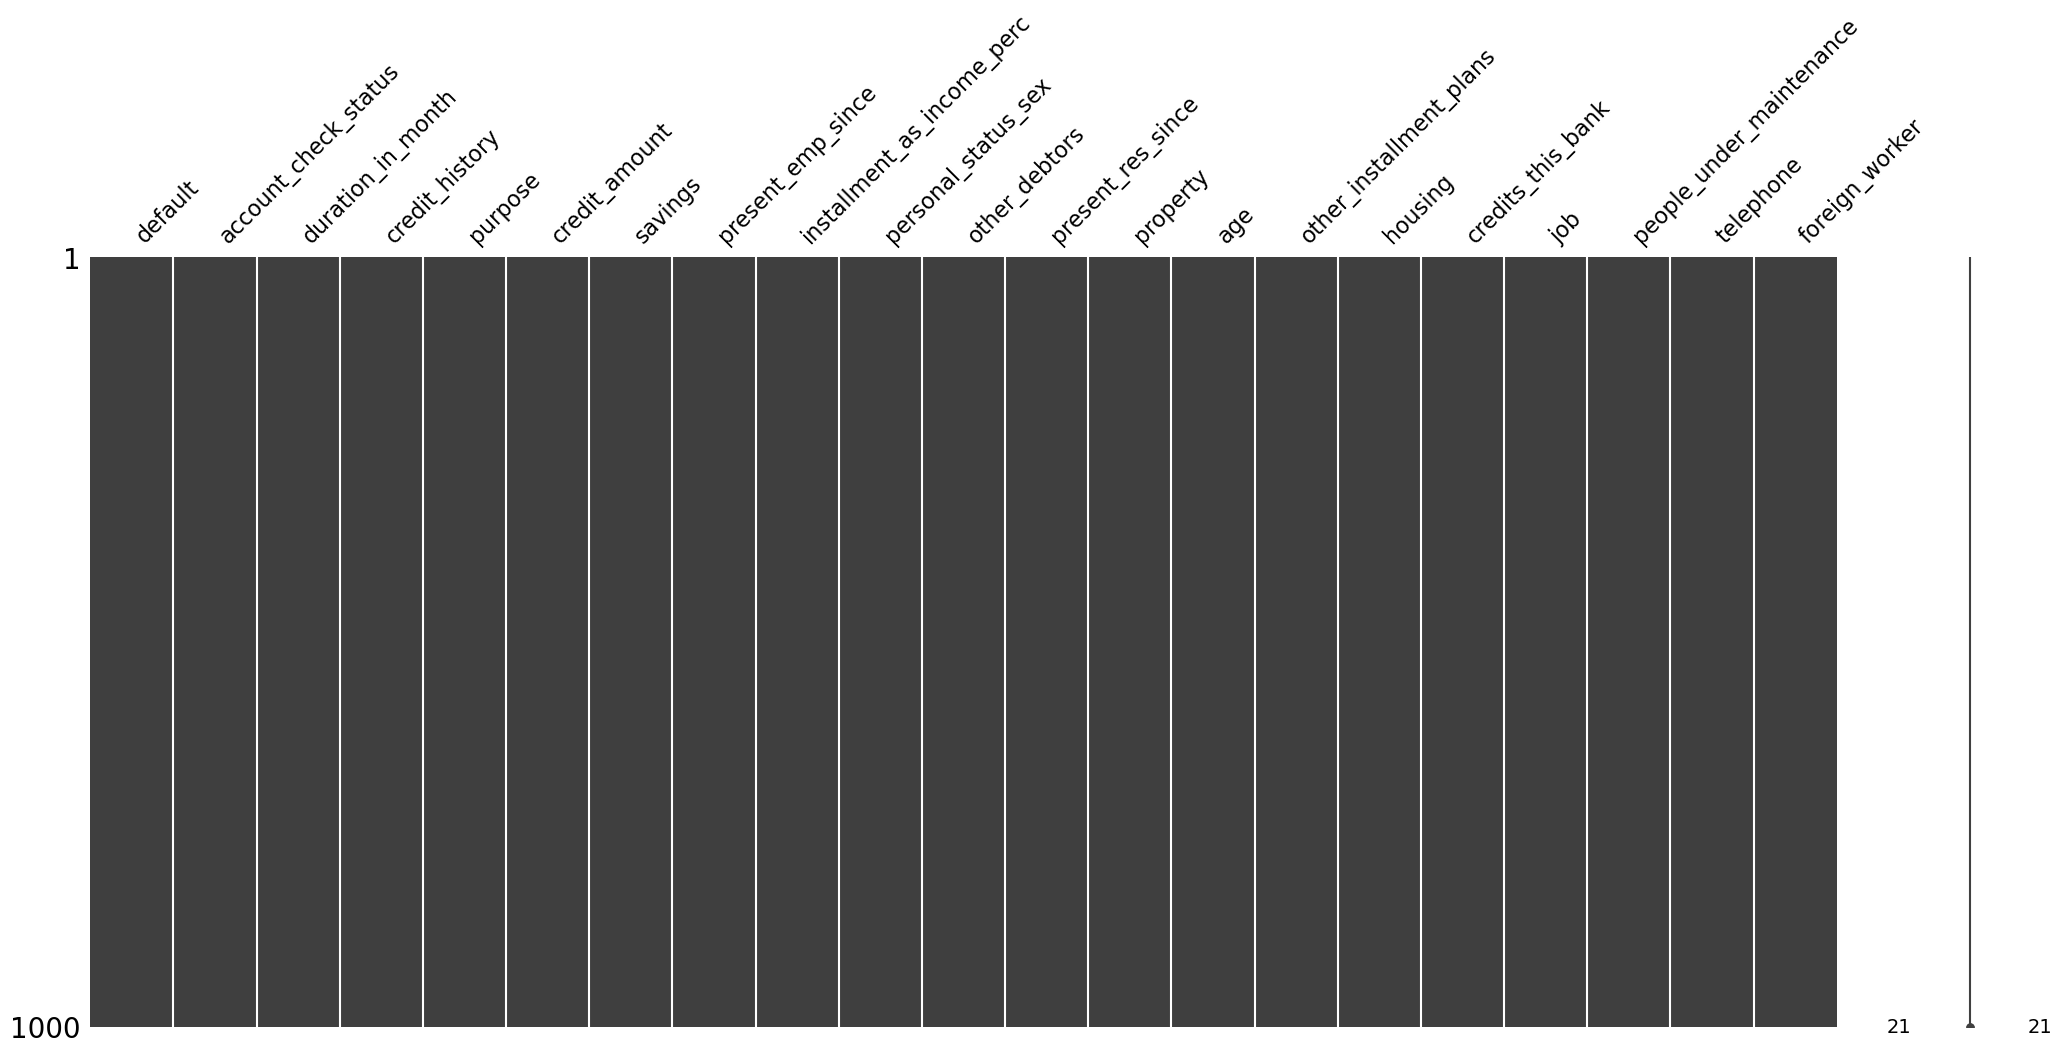

In [15]:
## Mostrando nuestra gráfica para visualizar presencia de nulos en las variables
msno.matrix(df_banco)
plt.show()

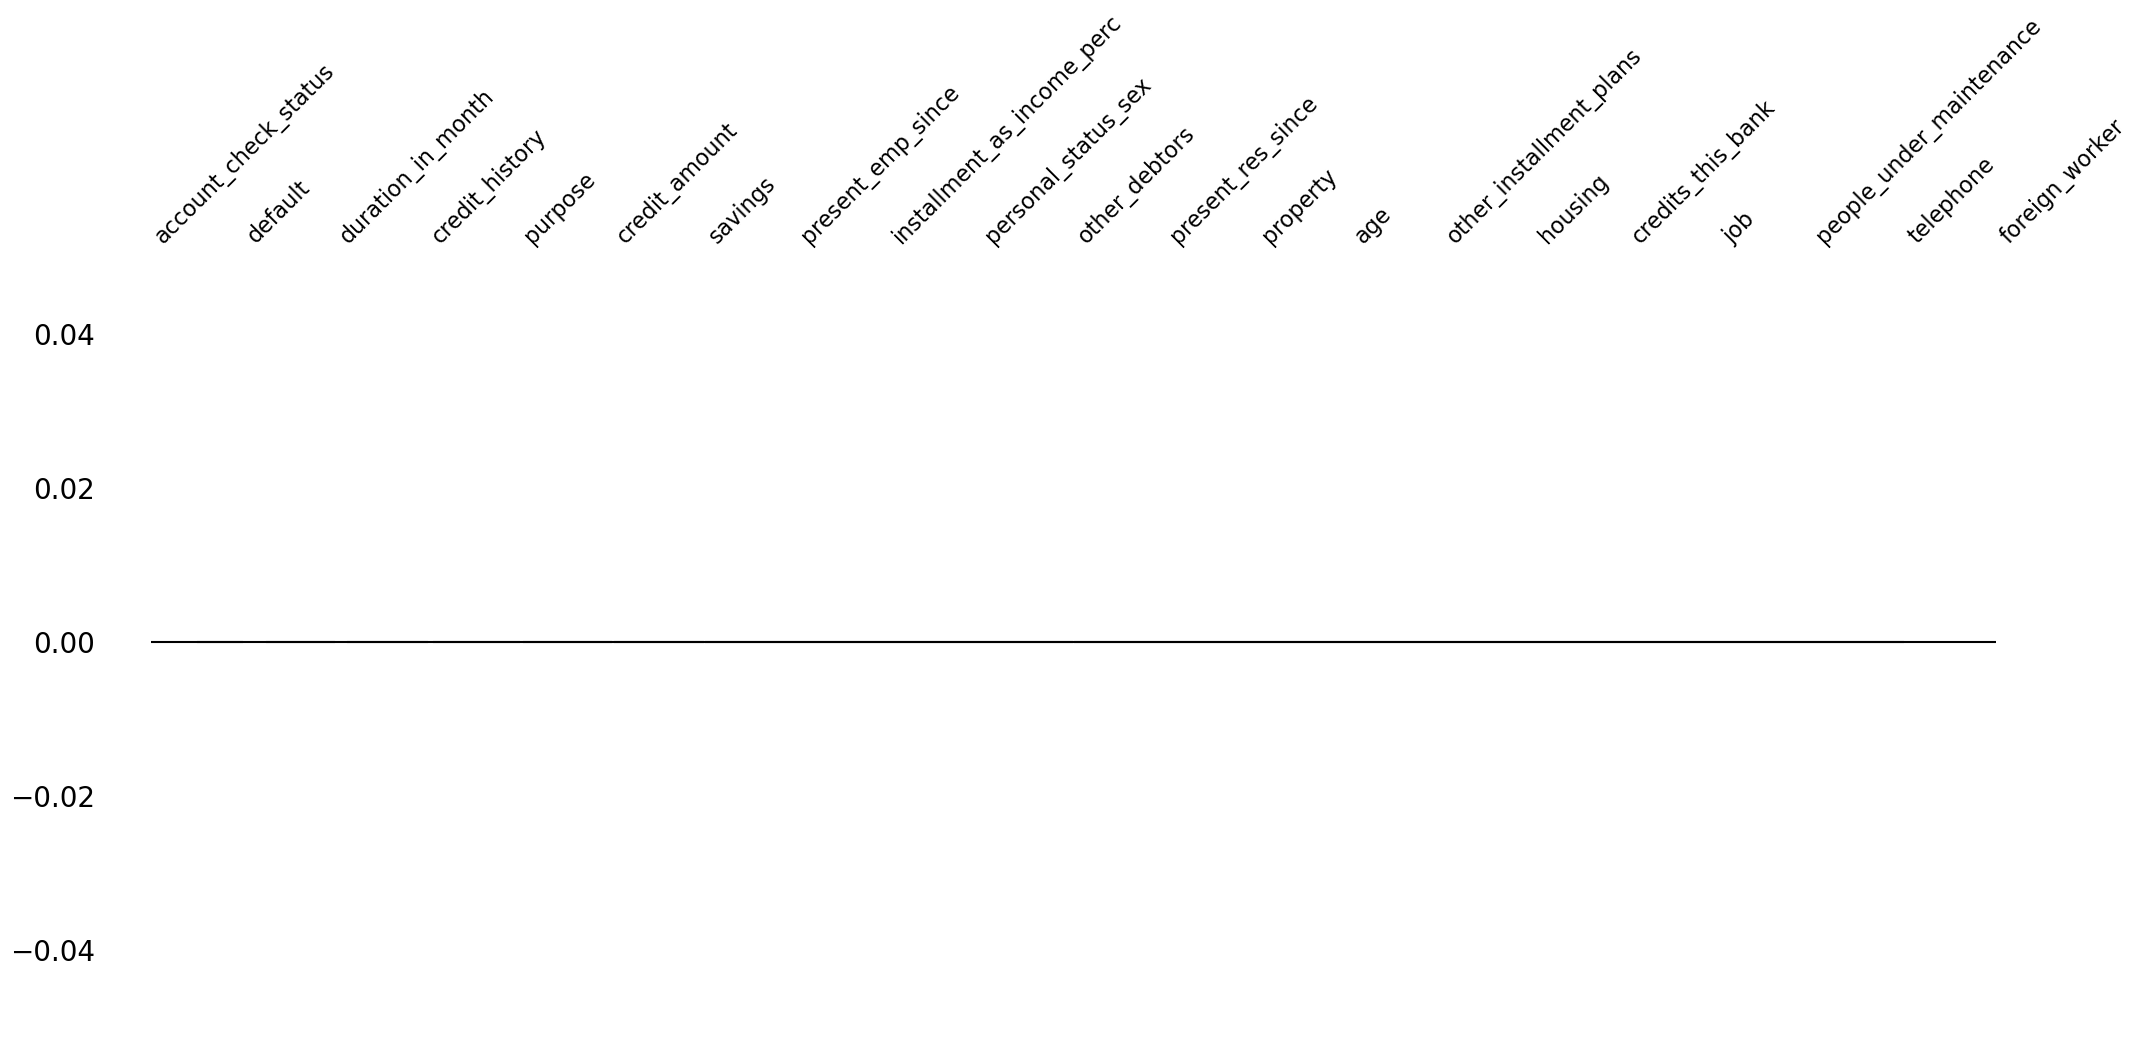

In [16]:
## Verificando presencia de nulos, con nuestra gráfica de dendograma
msno.dendrogram(df_banco)
plt.show()

## 1.4 Cambiando Texto por Valores numéricos

## <ins>1.4.1 Variables Categóricas</ins>

In [17]:
df_banco[variables_categoricas].head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


> * Lo que haremos será convertir todos los valores categóricos en numéricos a fin de poder trabajarlo posteriormente para el análisis

In [18]:
def convertir_categoricas_a_numericas(df):
    
    df['account_check_status'].unique()
    a = {'< 0 DM' : 1,
     '0 <= ... < 200 DM' : 2,
     '>= 200 DM / salary assignments for at least 1 year' : 3,
     'no checking account' :4
        }
    df['account_check_status'] = df['account_check_status'].map(a)
   

    df['credit_history'].unique()
    a = {'no credits taken/ all credits paid back duly' : 1,
     'all credits at this bank paid back duly' : 2,
     'existing credits paid back duly till now' : 3,
     'delay in paying off in the past' :4,
     'critical account/ other credits existing (not at this bank)' :5
        }
    df['credit_history'] = df['credit_history'].map(a)
    
    
    df['purpose'].unique()
    a = {'car (new)' : 1,
      'car (used)' : 2,
     'furniture/equipment' : 3,
     'radio/television' : 4,
     'domestic appliances' : 5,
     'repairs' : 6,
     'education' : 7,
     '(vacation - does not exist?)' : 8,
     'retraining' : 9,   
     'business' : 10,
     'Others' : 11
        }
    df['purpose'] = df_banco['purpose'].map(a)
    
    
    df['savings'].unique()
    a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
     '500 <= ... < 1000 DM ' : 3,
     '100 <= ... < 500 DM' : 4,
     '... < 100 DM' : 5   
    }
    df['savings'] = df['savings'].map(a)
    
    
    df['present_emp_since'].unique()
    a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
     '1 <= ... < 4 years' : 3,
     '... < 1 year ' : 4,
     'unemployed' : 5   
        }
    df['present_emp_since'] = df['present_emp_since'].map(a)
    
    
    df['personal_status_sex'].unique()
    a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
     'male : single' : 3,
     'male : married/widowed' : 4,
     'female : single' : 5   
        }
    df['personal_status_sex'] = df['personal_status_sex'].map(a)
    
    
    df['other_debtors'].unique()
    a = {'none' : 1,
      'co-applicant' : 2,
     'guarantor' : 3,
    }
    df['other_debtors'] = df['other_debtors'].map(a)
    
    
    df['property'].unique()
    a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
     'if not A121/A122 : car or other, not in attribute 6' : 3,
     'unknown / no property' : 4
        }
    df['property'] = df['property'].map(a)
    
    
    df['other_installment_plans'].unique()
    a = {'bank' : 1,
      'stores' : 2,
     'none' : 3,
        }
    df['other_installment_plans'] = df['other_installment_plans'].map(a)
    
    
    df['housing'].unique()
    a = {'rent' : 1,
      'own' : 2,
     'for free' : 3,
        }
    df['housing'] = df['housing'].map(a)
    
    
    df['job'].unique()
    a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
     'skilled employee / official' : 3,
     'management/ self-employed/ highly qualified employee/ officer' : 4
        }
    df['job'] = df['job'].map(a)
    
    
    df['telephone'].unique()
    a = {'none' : 1,
      'yes, registered under the customers name ' : 2,
        }
    df['telephone'] = df['telephone'].map(a)
    
    
    df['foreign_worker'].unique()
    a = {'yes' : 1,
      'no' : 0
        }
    df['foreign_worker'] = df['foreign_worker'].map(a)
    
    return df

In [19]:
## Se aplica la función generada al dataframe
df_banco = convertir_categoricas_a_numericas(df_banco)
df_banco[variables_categoricas] ## Visualizamos el dataframe solo para las variables categóricas

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,1,5,5,1,1,3,1,1,3,2,3,2,1
1,2,3,5,5,3,2,1,1,3,2,3,1,1
2,4,5,8,5,2,3,1,1,3,2,2,1,1
3,1,3,4,5,2,3,3,2,3,3,3,1,1
4,1,4,1,5,3,3,1,4,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,3,4,5,2,2,1,1,3,2,2,1,1
996,1,3,2,5,3,1,1,2,3,2,4,2,1
997,4,3,5,5,1,3,1,3,3,2,3,1,1
998,1,3,5,5,3,3,1,4,3,3,3,2,1


In [20]:
## Validamos que esten presentes todos los datos convertidos
df_banco[variables_categoricas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   account_check_status     1000 non-null   int64
 1   credit_history           1000 non-null   int64
 2   purpose                  1000 non-null   int64
 3   savings                  1000 non-null   int64
 4   present_emp_since        1000 non-null   int64
 5   personal_status_sex      1000 non-null   int64
 6   other_debtors            1000 non-null   int64
 7   property                 1000 non-null   int64
 8   other_installment_plans  1000 non-null   int64
 9   housing                  1000 non-null   int64
 10  job                      1000 non-null   int64
 11  telephone                1000 non-null   int64
 12  foreign_worker           1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


In [21]:
# archivo_txt = 'diccionario.txt'

# with open(archivo_txt, 'r') as txt:
#     contenido = txt.read()
#     print(contenido)

## <ins>1.4.2 Variables Numéricas</ins>

In [22]:
df_banco[variables_numericas]

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...,...
995,0,12,1736,3,4,31,1,1
996,0,30,3857,4,4,40,1,1
997,0,12,804,4,4,38,1,1
998,1,45,1845,4,4,23,1,1


> * Lo que haremos será convertir todos los valores numéricos de altos valores en rangos. Esto con la finalidad de poder realizar el análisis de manera adecuada.

In [23]:
def convertir_numericas_a_discretas(df):
    df['duration_in_month']
    intervalos = [1] + list(range(12,73,12))
    etiquetas = list(range(1,len(intervalos)))
    df['rango_plazos_credito'] = pd.cut(df['duration_in_month'], bins=intervalos, labels=etiquetas, right=[False] * (len(intervalos) - 2) + [True]).astype('int64')
    
    
    df['credit_amount']
    intervalos = [1] + list(range(1000,20001,1000))
    etiquetas = list(range(1,len(intervalos)))
    df['rango_valor_credito'] = pd.cut(df['credit_amount'],bins=intervalos,labels=etiquetas,right=False).astype('int64')
    
    
    df['age']
    intervalos = [18] + list(range(30,81,10))
    etiquetas = list(range(1,len(intervalos)))
    df['rango_edad'] = pd.cut(df['age'],bins=intervalos,labels=etiquetas,right=False).astype('int64')
    
    return df

In [24]:
## Se aplica la función generada al dataframe
df_banco = convertir_numericas_a_discretas(df_banco)
df_banco[variables_numericas + ['rango_plazos_credito','rango_valor_credito','rango_edad']] ## Visualizamos el dataframe solo para las variables categóricas

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,rango_plazos_credito,rango_valor_credito,rango_edad
0,0,6,1169,4,4,67,2,1,1,2,5
1,1,48,5951,2,2,22,1,1,4,6,1
2,0,12,2096,2,3,49,1,2,1,3,3
3,0,42,7882,2,4,45,1,2,4,8,3
4,1,24,4870,3,4,53,2,2,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1736,3,4,31,1,1,1,2,2
996,0,30,3857,4,4,40,1,1,3,4,3
997,0,12,804,4,4,38,1,1,1,1,2
998,1,45,1845,4,4,23,1,1,4,2,1


In [25]:
## Validamos que todas nuestras variables no tengan datos nulos
df_banco[variables_numericas + ['rango_plazos_credito','rango_valor_credito','rango_edad']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   duration_in_month           1000 non-null   int64
 2   credit_amount               1000 non-null   int64
 3   installment_as_income_perc  1000 non-null   int64
 4   present_res_since           1000 non-null   int64
 5   age                         1000 non-null   int64
 6   credits_this_bank           1000 non-null   int64
 7   people_under_maintenance    1000 non-null   int64
 8   rango_plazos_credito        1000 non-null   int64
 9   rango_valor_credito         1000 non-null   int64
 10  rango_edad                  1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


In [26]:
# nan_values = df_banco['duration_in_month'].loc[df_banco['duration_in_month'].isnull()]

# 677   NaN
# Name: duration_in_month, dtype: float64

# df['duration_in_month'][677]       

In [27]:
# archivo_txt = 'diccionario.txt'

# with open(archivo_txt, 'r') as txt:
#     contenido = txt.read()
#     print(contenido)

## <ins>1.4.3 Feature Engineering</ins>

Vamos a crear dos columnas más, a partir de la variable **'personal_status_sex'**, donde separaremos el **'sexo'** y el **'estado_civil'**, esto con la finalidad de discretizar de mejor manera estos valores y para el posterior análisis.
> * SEXO
    * **1** : Para el sexo femenino 
    * **0** : Para el sexo masculino
    
> * ESTADO CIVIL
    * **1** : Para los solteros 
    * **0** : Para todos los demás casos

In [28]:
## Verificamos nuestras categorias que tenemos para la variable
df_banco['personal_status_sex'].unique()

array([3, 2, 1, 4], dtype=int64)

> En este caso, notamos que no existe valores para la **categoría 5**, la cual era **'female : single'**. Dado esto, solo tenemos Hombres solteros en todo nuestro dataset.

In [29]:
## Para nuestra nueva variable 'sexo'
a = { 2 : 1,
     1 : 0,
     3 : 0,
     4 : 0
    }
df_banco['sexo'] = df_banco['personal_status_sex'].map(a)

## Para nuestra nueva variable 'estado_civil'
a = { 3 : 1,
     1 : 0,
     2 : 0,
     4 : 0
    }
df_banco['estado_civil'] = df_banco['personal_status_sex'].map(a)

In [30]:
## Verificamos en nuestro dataset, tanto nuestra variable inicial como nuestras variables creadas
df_banco[['personal_status_sex','sexo','estado_civil']]

,personal_status_sex,sexo,estado_civil
0,3,0,1
1,2,1,0
2,3,0,1
3,3,0,1
4,3,0,1
...,...,...,...
995,2,1,0
996,1,0,0
997,3,0,1
998,3,0,1


In [31]:
df_banco['personal_status_sex'].unique()

array([3, 2, 1, 4], dtype=int64)

In [32]:
df_banco['sexo'].unique()

array([0, 1], dtype=int64)

In [33]:
df_banco['estado_civil'].unique()

array([1, 0], dtype=int64)

## <ins>1.4.4 Dataframe Transformado</ins>

In [34]:
## Validamos nuestro dataframe, visualizamos que tenemos muchas variables creadas
df_banco.head(10)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,2,1,1,2,5,0,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,1,1,4,6,1,1,0
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,1,1,1,3,3,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,1,1,4,8,3,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,1,1,2,5,4,0,1
5,0,4,36,3,8,9055,1,3,2,3,1,4,4,35,3,3,1,2,2,2,1,3,10,2,0,1
6,0,4,24,3,4,2835,3,1,3,3,1,4,2,53,3,2,1,3,1,1,1,2,3,4,0,1
7,0,2,36,3,2,6948,5,3,2,3,1,2,3,35,3,1,1,4,1,2,1,3,7,2,0,1
8,0,4,12,3,5,3059,2,2,2,1,1,4,1,61,3,2,1,2,1,1,1,1,4,5,0,0
9,1,2,30,5,1,5234,5,5,4,4,1,2,3,28,3,2,2,4,1,1,1,3,6,1,0,0


* Lo que realizaremos a continuación, será eliminar las variables que no utilizaremos, ya que muchas variables fueron creadas de las variables iniciales, indicaremos cuales serán descartadas.

In [35]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker',
       'rango_plazos_credito', 'rango_valor_credito', 'rango_edad', 'sexo',
       'estado_civil'],
      dtype='object')

In [36]:
df_banco = df_banco.drop(columns= ['duration_in_month','credit_amount','personal_status_sex','age'])
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,2,1,1,2,5,0,1
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,1,1,4,6,1,1,0
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,1,1,1,3,3,0,1
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,1,1,4,8,3,0,1
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,1,1,2,5,4,0,1


In [37]:
## Validando que no tengamos valores nulos || Todos nuestros valores son numéricos y de tipo entero
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   credit_history              1000 non-null   int64
 3   purpose                     1000 non-null   int64
 4   savings                     1000 non-null   int64
 5   present_emp_since           1000 non-null   int64
 6   installment_as_income_perc  1000 non-null   int64
 7   other_debtors               1000 non-null   int64
 8   present_res_since           1000 non-null   int64
 9   property                    1000 non-null   int64
 10  other_installment_plans     1000 non-null   int64
 11  housing                     1000 non-null   int64
 12  credits_this_bank           1000 non-null   int64
 13  job                         1000 non-null   int64
 14  people_un

In [38]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,0.963000,1.975000,3.766000,2.111000,0.310000,0.54800
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.968149,2.821206,1.156727,0.462725,0.49794
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.00000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.00000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.00000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,1.000000,6.000000,19.000000,6.000000,1.000000,1.00000


# 2. Análisis Exploratorio de Datos

In [39]:
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,2,1,1,2,5,0,1
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,1,1,4,6,1,1,0
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,1,1,1,3,3,0,1
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,1,1,4,8,3,0,1
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,1,1,2,5,4,0,1


## 2.1 <ins>Análisis Univariado</ins>

### 2.1.1 Análisis Univariado: Target

Realizamos un análisis inicial de la Variable target ('default'), esto con la finalidad de observar la distribución de este valor en nuestro dataframe. Se realizan dos gráficos, el de barras y el de torta. Este último para observar los porcentajes.

In [40]:
target = 'default'

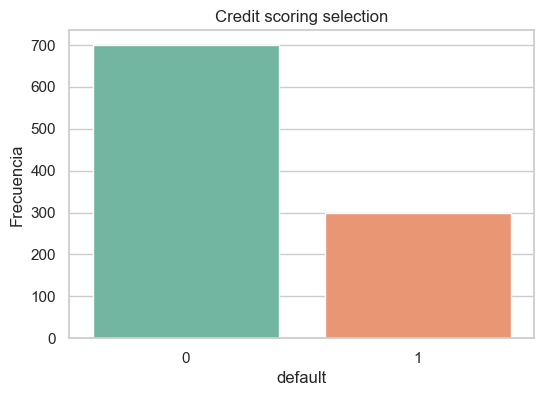

In [41]:
# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.countplot(x=target, data=df_banco, palette="Set2")
plt.title('Credit scoring selection')
plt.xlabel(target)
plt.ylabel('Frecuencia')
plt.show()

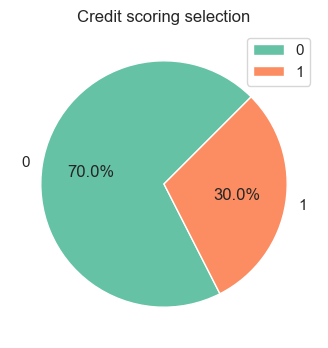

In [42]:
## Grafica de pie
valores = df_banco[target].value_counts()
etiqueta = df_banco[target].unique()
plt.figure(figsize=(6,4))
plt.pie(valores,labels=etiqueta,autopct="%1.1f%%", colors= ['#66c2a5', '#fc8d62'], startangle=45)
plt.legend(loc='best')
plt.title('Credit scoring selection')
plt.show()

### 2.1.2 Análisis Univariado: Variables numéricas

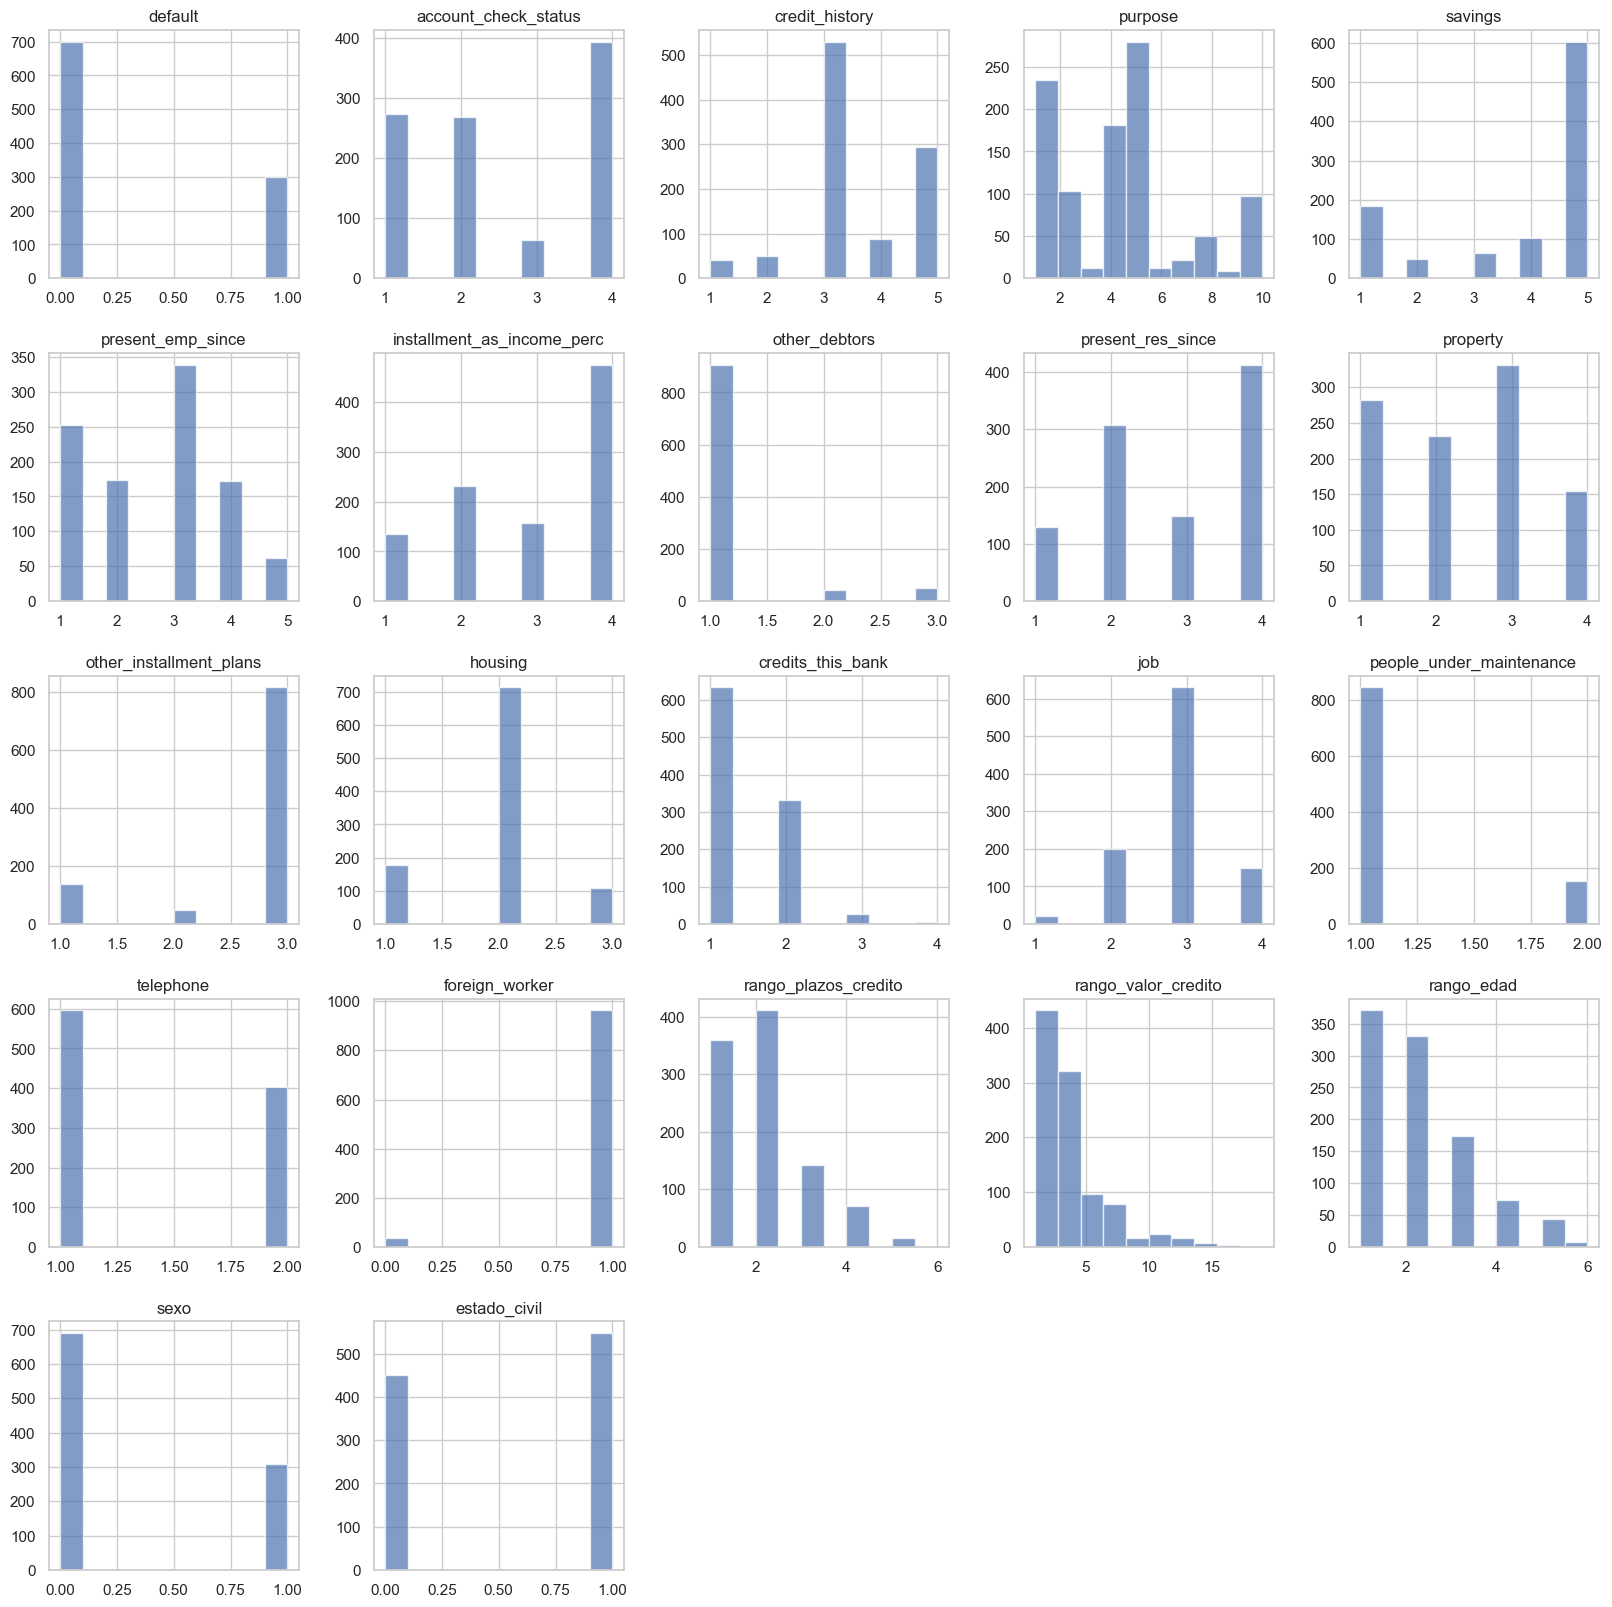

In [46]:
# Dibujamos gráfica de frecuencia de todos los atributos
plt.rcParams['figure.figsize'] = [20,20];
sns.set(style="whitegrid")
df_banco.hist(alpha=0.7)
plt.show()

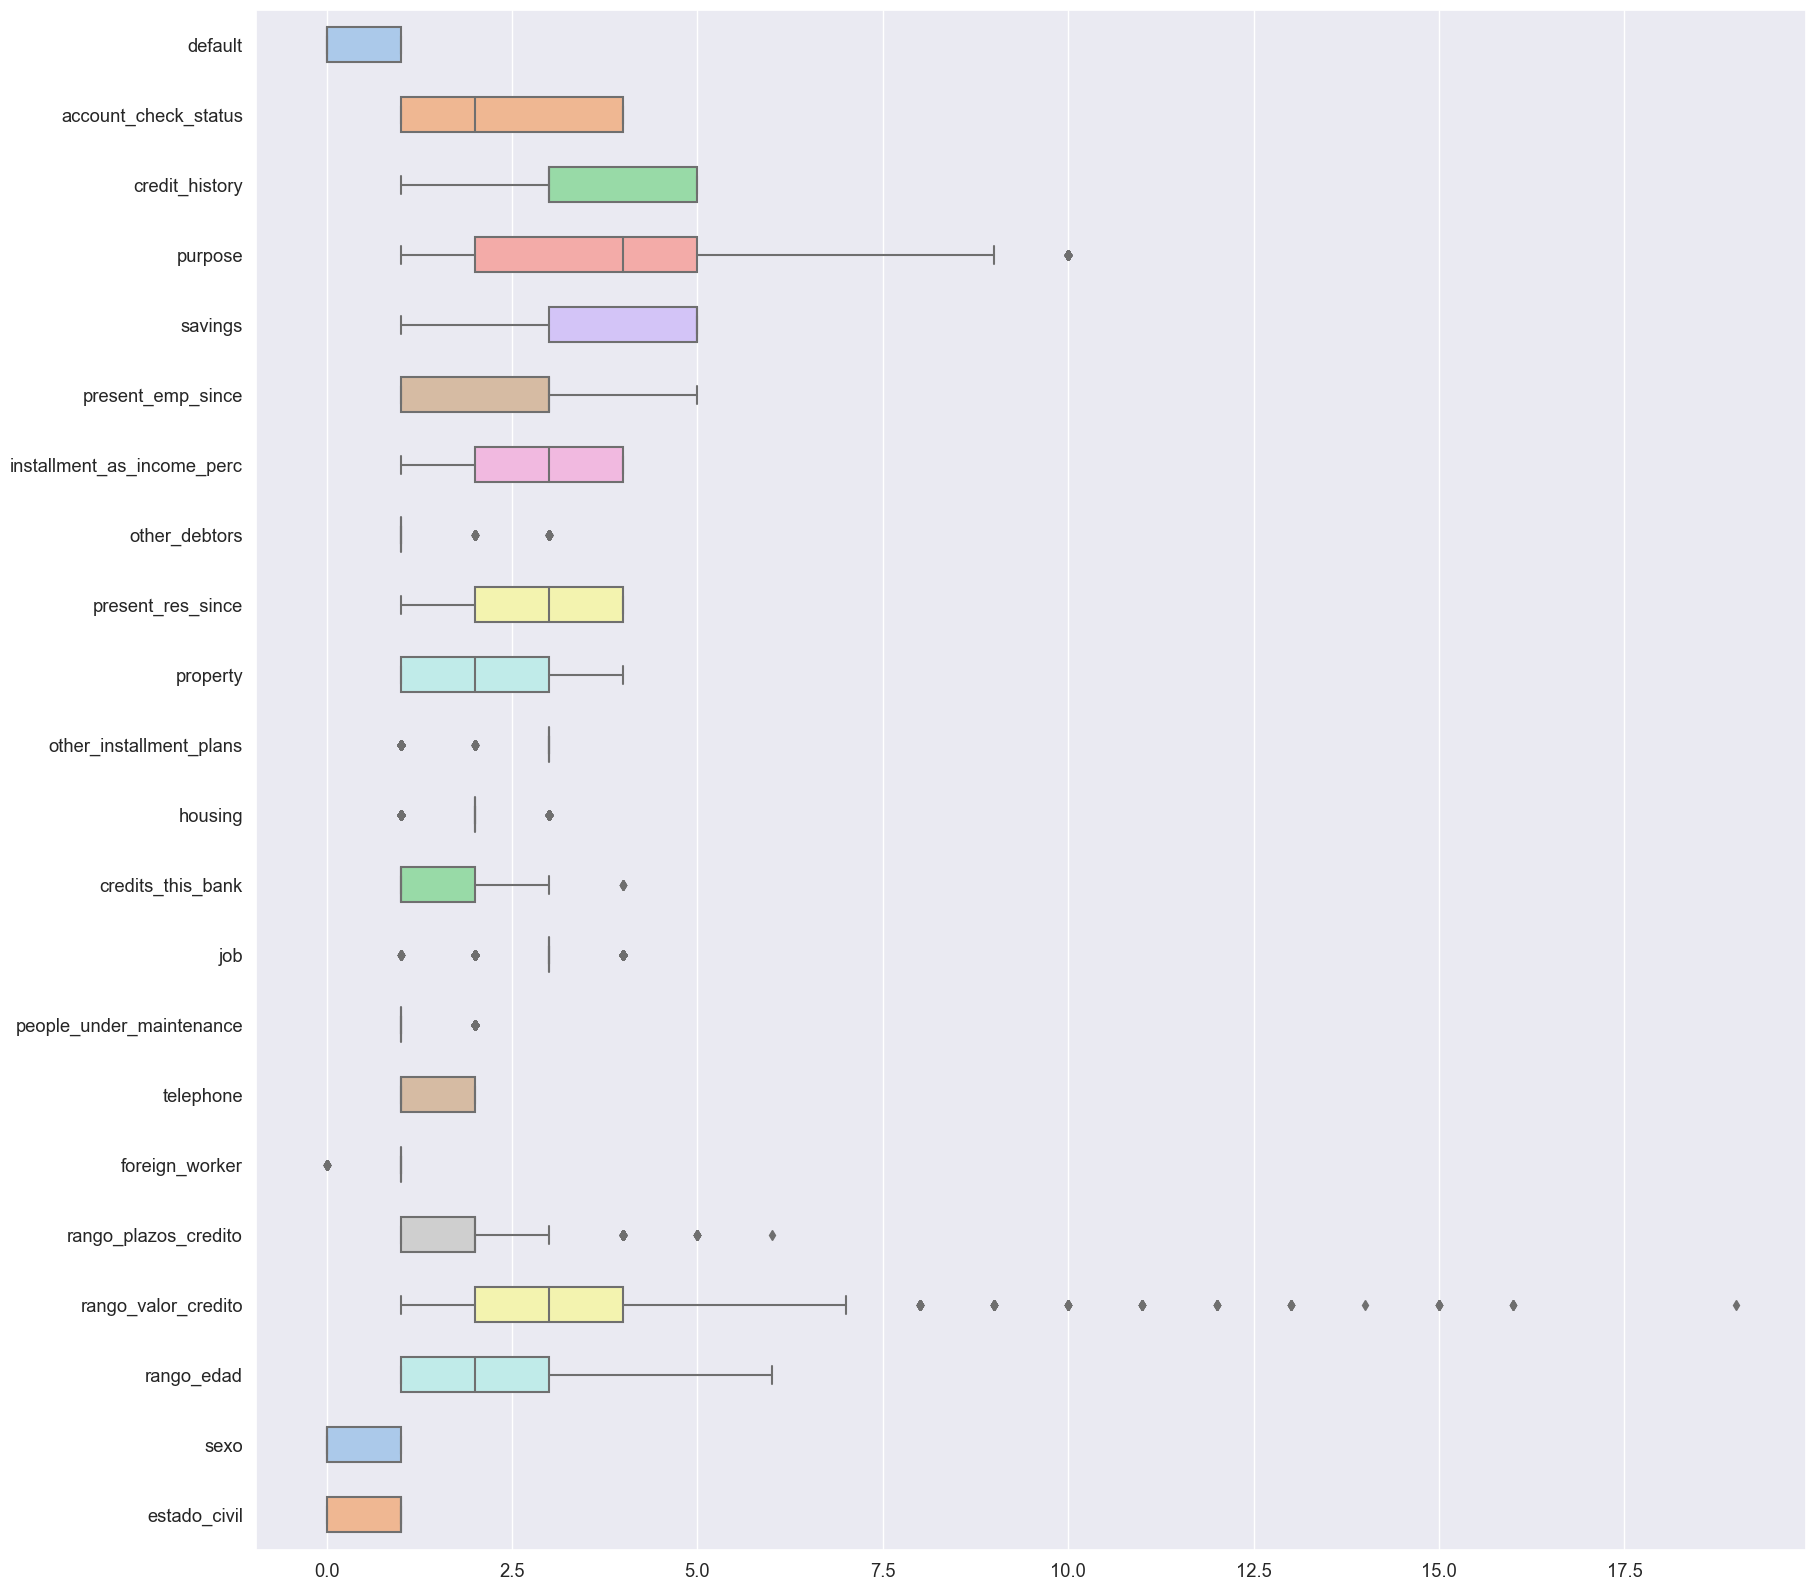

In [47]:
# Dibujamos gráfica de boxplot de todos los atributos
plt.rcParams['figure.figsize'] = [20,20];
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
#df_banco.boxplot(rot=60, figsize=(20,20))
sns.boxplot(data=df_banco, orient="h", palette="pastel", width=0.5)
plt.show()

In [48]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,0.963000,1.975000,3.766000,2.111000,0.310000,0.54800
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.968149,2.821206,1.156727,0.462725,0.49794
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.00000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.00000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.00000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,1.000000,6.000000,19.000000,6.000000,1.000000,1.00000


* Según los gráficos de Boxplot e Histograma analizados, observamos la presencia de posibles atípicos en 3 variables: **rango_valor_credito, rango_plazos_credito y purpose**.


* Los atípicos para estas variables se observan por la parte del máximo valor de la variable, ya que el valor quantil 75, está alejado del máximo. De todas maneras esto se visualizará posteriormente.


* El resto de variables, observamos que se manejan de forma adecuada, la distancia entre la media con los mínimos y máximos no es considerable. Además los quantiles 25 y 75 no están tan alejados del mínimo y máximo de la variable respectivamente. Esto nos demuestra la no presencia de atípicos para estas variables.

### 2.1.3 Tratamiento de Atípicos

Estas son las tres variables que hemos elegido para el tratamiento de Atípicos, luego de analizar sus gráficos de boxplot.

In [49]:
df_banco[['rango_plazos_credito','rango_valor_credito', 'purpose']]

,rango_plazos_credito,rango_valor_credito,purpose
0,1,2,5
1,4,6,5
2,1,3,8
3,4,8,4
4,2,5,1
...,...,...,...
995,1,2,4
996,3,4,2
997,1,1,5
998,4,2,5


In [50]:
df_banco[['rango_plazos_credito','rango_valor_credito', 'purpose']].describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75])

,rango_plazos_credito,rango_valor_credito,purpose
count,1000.000000,1000.000000,1000.000000
mean,1.975000,3.766000,4.277000
std,0.968149,2.821206,2.739302
min,1.000000,1.000000,1.000000
1%,1.000000,1.000000,1.000000
2.5%,1.000000,1.000000,1.000000
5%,1.000000,1.000000,1.000000
10%,1.000000,1.000000,1.000000
50%,2.000000,3.000000,4.000000
75%,2.000000,4.000000,5.000000


In [51]:
df_banco[['rango_plazos_credito','rango_valor_credito', 'purpose']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

,rango_plazos_credito,rango_valor_credito,purpose
count,1000.000000,1000.000000,1000.000000
mean,1.975000,3.766000,4.277000
std,0.968149,2.821206,2.739302
min,1.000000,1.000000,1.000000
50%,2.000000,3.000000,4.000000
75%,2.000000,4.000000,5.000000
90%,3.000000,8.000000,9.000000
95%,4.000000,10.000000,10.000000
97.5%,4.000000,12.000000,10.000000
99%,5.000000,15.000000,10.000000


* Luego de analizar más detenidamente los percentiles para estas tres variables, que inicialmente observamos en la gráfica de boxplot con valores atípicos, notamos que la única que se considerará para el tratamiento es la variable **rango_valor_credito**.


* Las otras dos variables, si bien es cierto en el gráfico de boxplot, presentaban datos fuera de la caja, cuando observamos los percentiles 95 y 97.5, no hay diferencia tan grande con el valor máximo. Podríamos considerar **rango_plazos_credito**, pero tener en cuenta que estos valores analizados ya habían sido transformados previamente, debido a esto se considera dejarlo para el análisis.

### 2.1.3.1 Truncamiento por Percentiles : Acotando variable "rango_valor_credito"

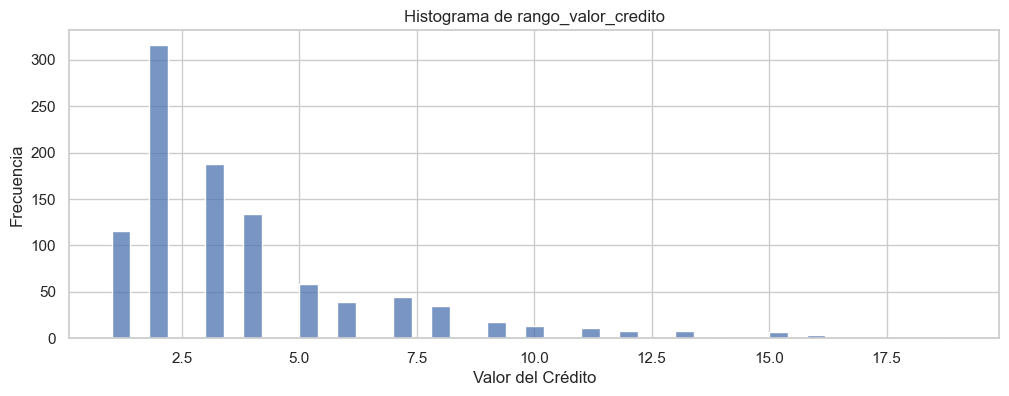

In [52]:
## Gráfico de Histograma previo al truncamiento por percentiles
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
sns.histplot(data=df_banco['rango_valor_credito'], palette='Set2')
plt.title('Histograma de rango_valor_credito')
plt.xlabel('Valor del Crédito')
plt.ylabel('Frecuencia')
plt.show()

* Acotaremos al percentil 99, debido a que no queremos perder demasiada información, recordemos que estos valores ya habian sido ajustados previamente cuando discretizamos nuestro conjunto de datos. De todas maneras es necesario hacer el Truncamiento debido a que la presencia de atípicos es notoria. Sin embargo, esto no hará que se elimine del todo los atípicos pero nos ayudará a mejorar un poco nuestro análisis.

In [53]:
# Calculamos los percentiles p1 y p99
p1 = np.percentile(df_banco['rango_valor_credito'],1)
p99 = np.percentile(df_banco['rango_valor_credito'],99)
p1, p99

(1.0, 15.0)

In [54]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
df_banco['rango_valor_credito'] = np.clip(df_banco['rango_valor_credito'],p1,p99)

In [55]:
## Realizamos un análisis descriptivo para nuestras tres variables
df_banco[['rango_plazos_credito','rango_valor_credito', 'purpose']].describe()

,rango_plazos_credito,rango_valor_credito,purpose
count,1000.000000,1000.000000,1000.000000
mean,1.975000,3.758000,4.277000
std,0.968149,2.785533,2.739302
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000
50%,2.000000,3.000000,4.000000
75%,2.000000,4.000000,5.000000
max,6.000000,15.000000,10.000000


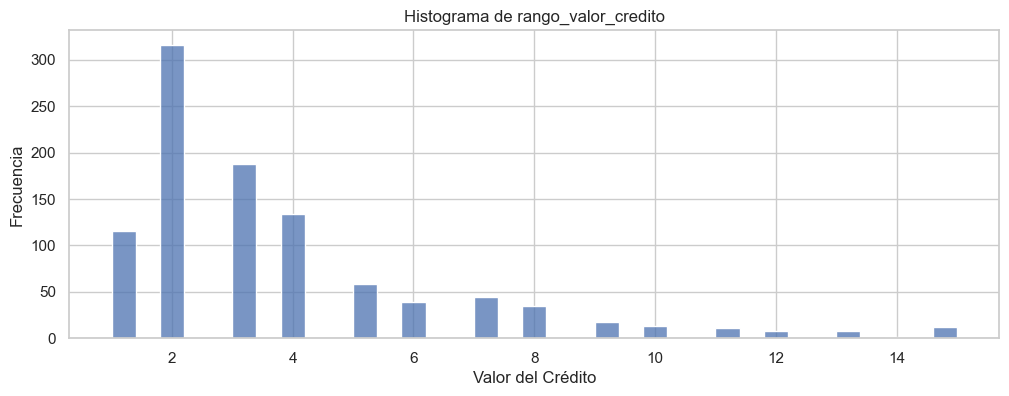

In [56]:
## Graficando el histograma, con el tratamiento de atípicos realizado
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
sns.histplot(data=df_banco['rango_valor_credito'], palette='Set2')
plt.title('Histograma de rango_valor_credito')
plt.xlabel('Valor del Crédito')
plt.ylabel('Frecuencia')
plt.show()

* Como podemos observar, nuestra distribución mejoro mucho comparada con la que teniamos incialmente. Como indicabamos esto no eliminará del todo nuestra presencia de Atípicos para esta variable, debido a que tampoco queremos ajustar valores que quizás puedan modificar luego nuestro modelo

In [57]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,0.963000,1.975000,3.758000,2.111000,0.310000,0.54800
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.968149,2.785533,1.156727,0.462725,0.49794
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.00000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.00000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.00000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,1.000000,6.000000,15.000000,6.000000,1.000000,1.00000


## 2.2 Análisis Bivariado

### <ins>Análisis Bivariado: Variable target Vs. Variables Numéricas - Gráfica de frecuencia</ins>

In [58]:
## Seleccionamos todas nuestras variables a excepción del target
variables = df_banco.drop(columns='default').columns
variables

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'installment_as_income_perc', 'other_debtors',
       'present_res_since', 'property', 'other_installment_plans', 'housing',
       'credits_this_bank', 'job', 'people_under_maintenance', 'telephone',
       'foreign_worker', 'rango_plazos_credito', 'rango_valor_credito',
       'rango_edad', 'sexo', 'estado_civil'],
      dtype='object')

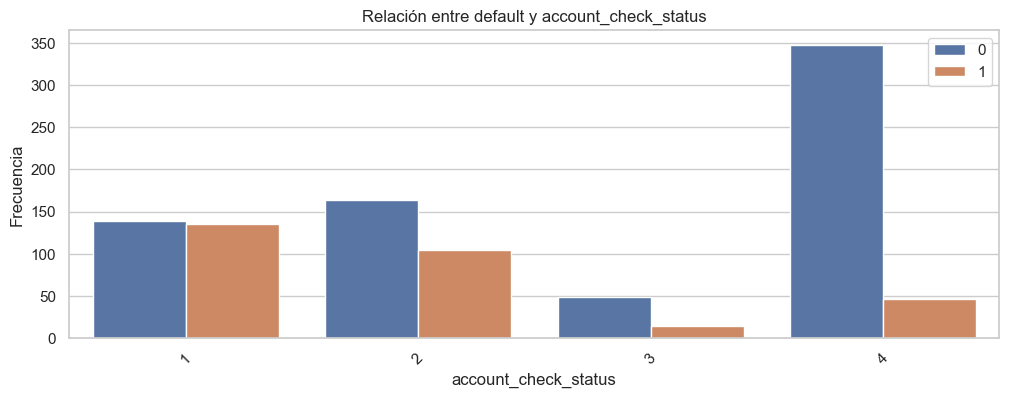

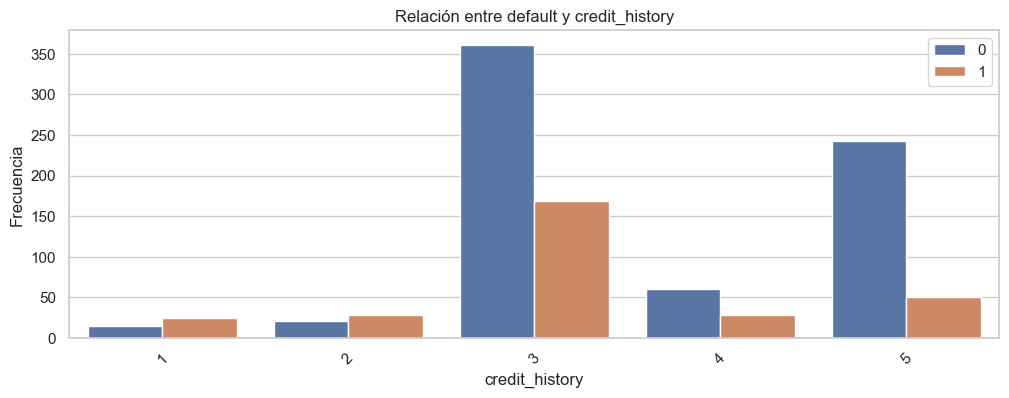

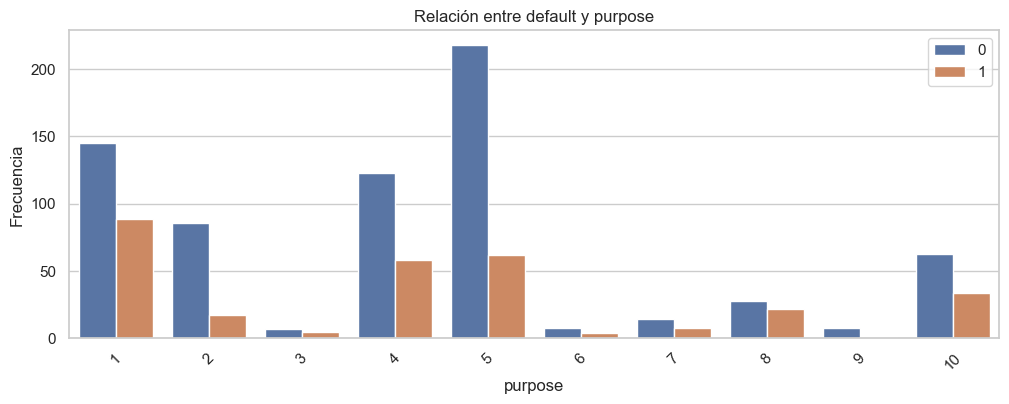

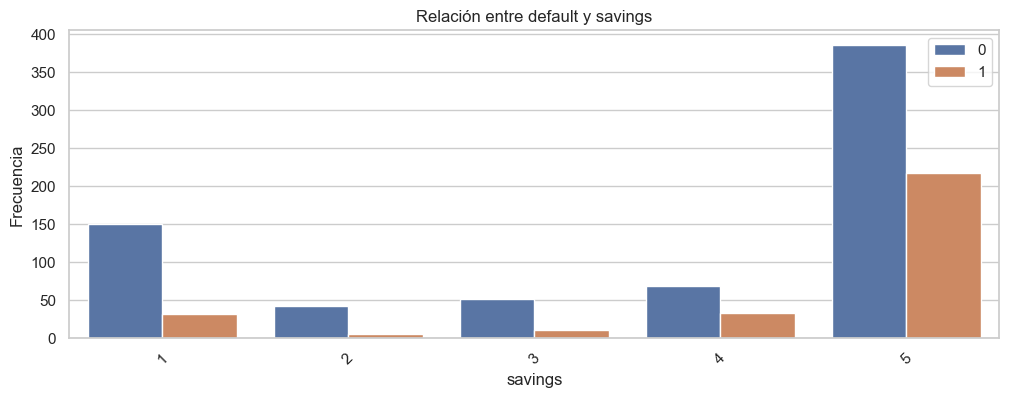

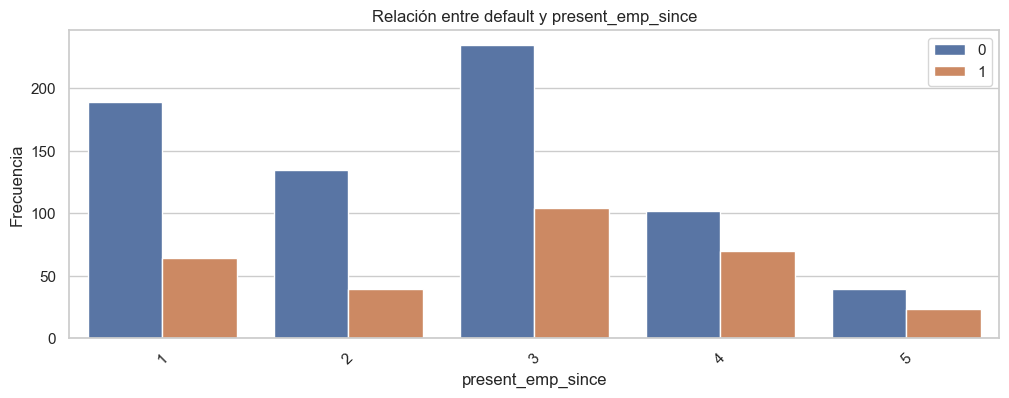

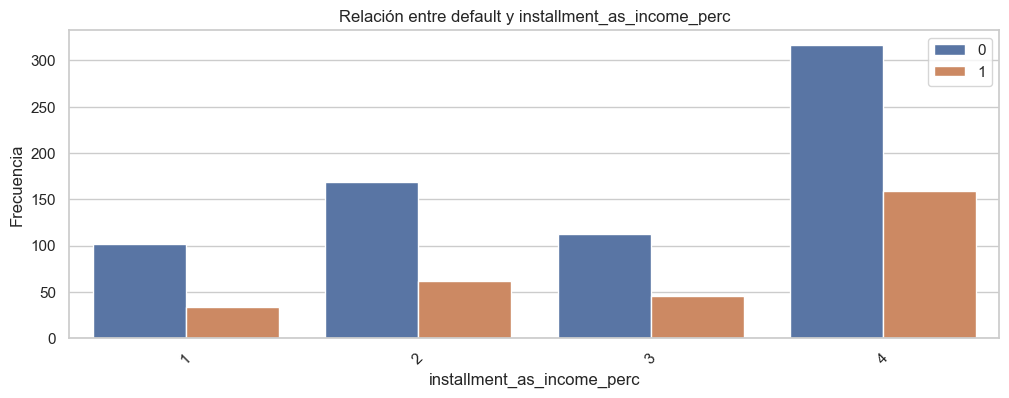

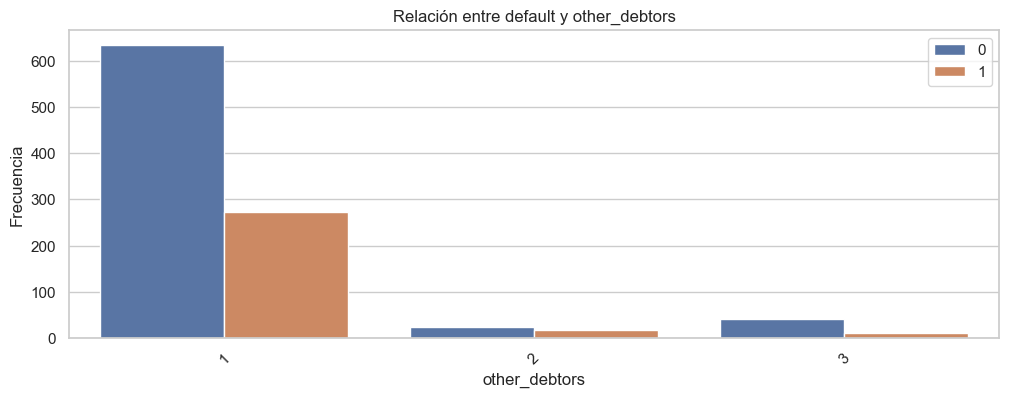

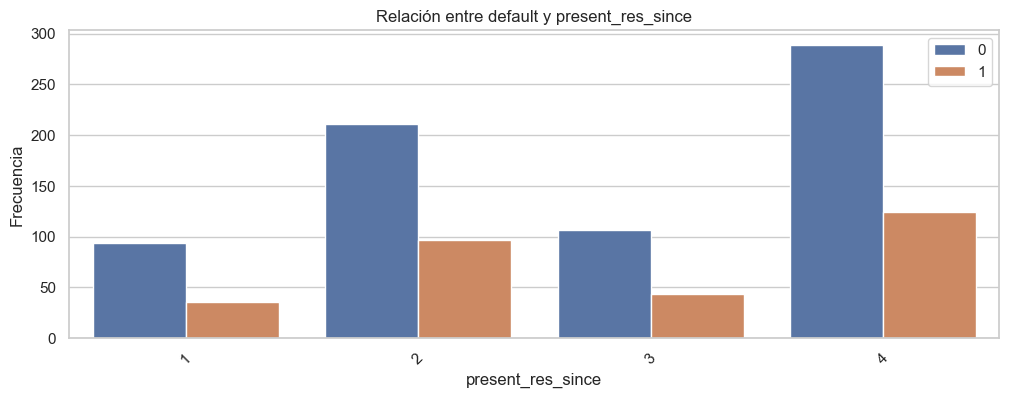

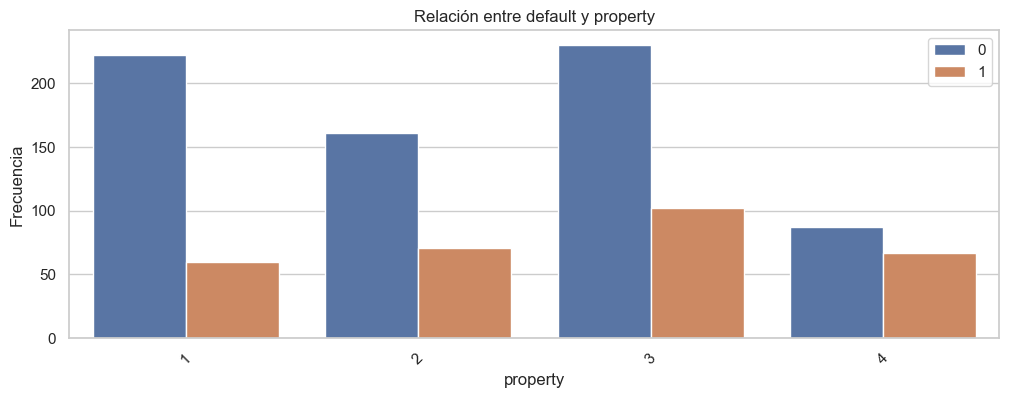

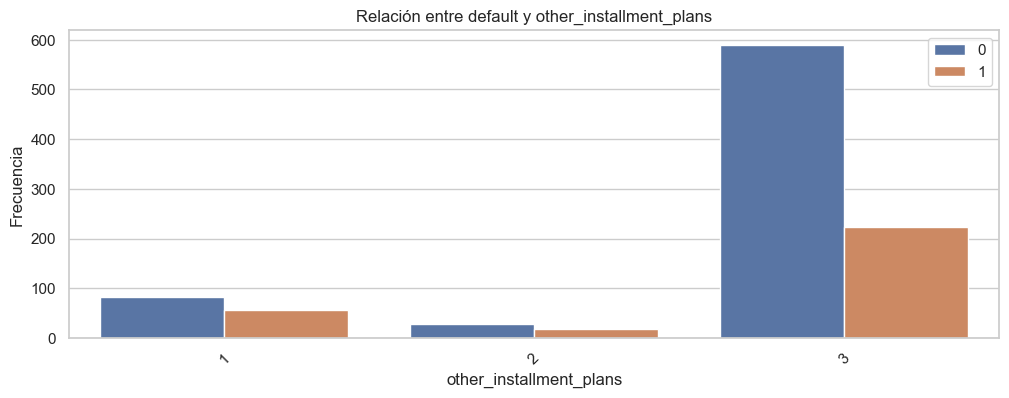

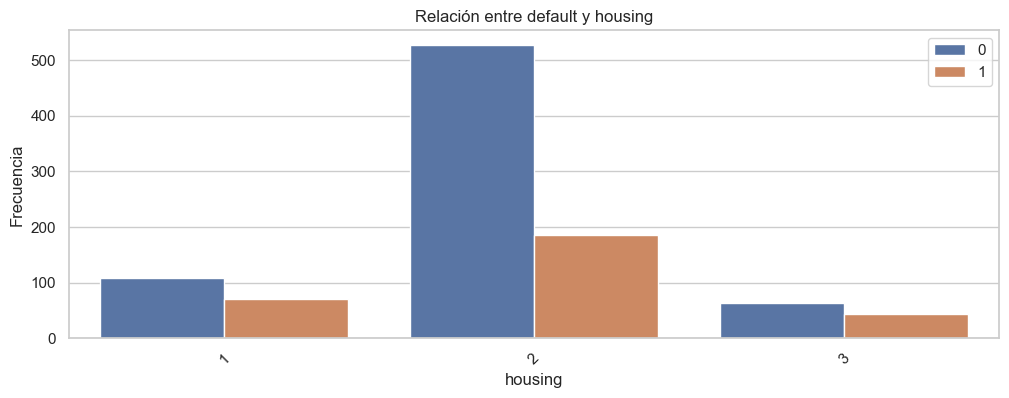

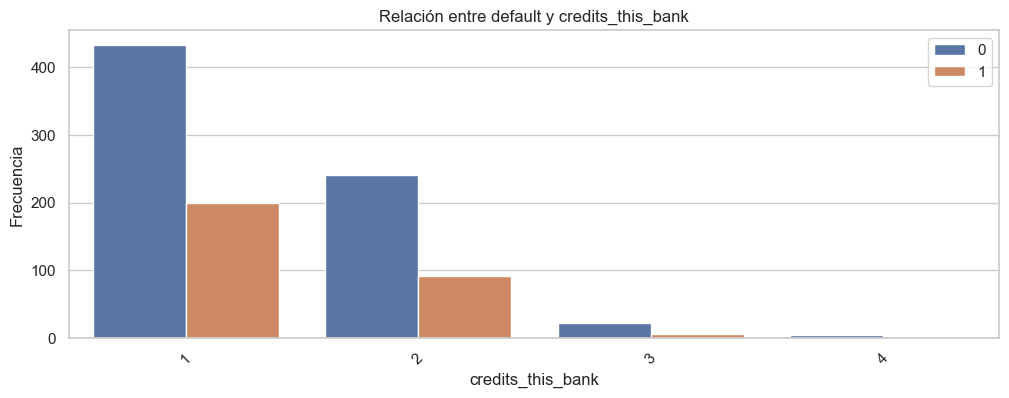

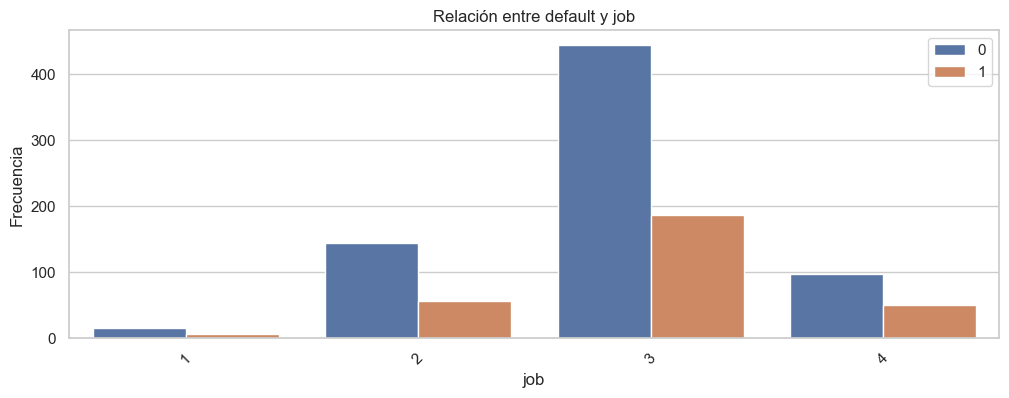

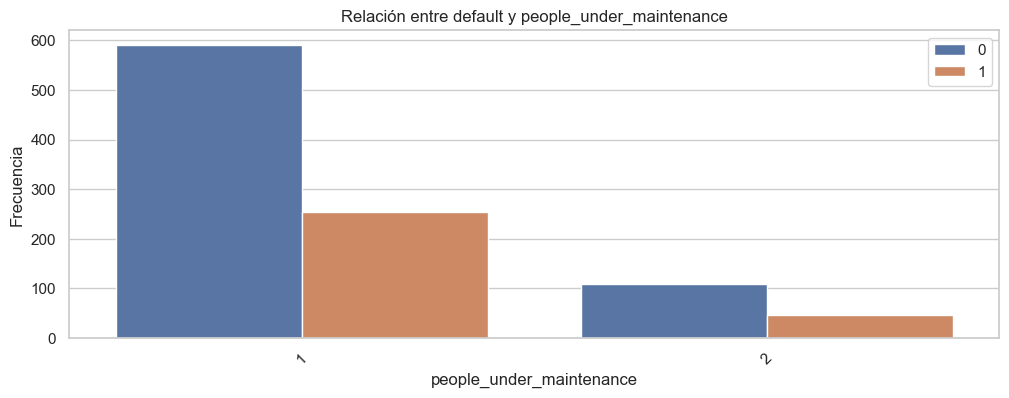

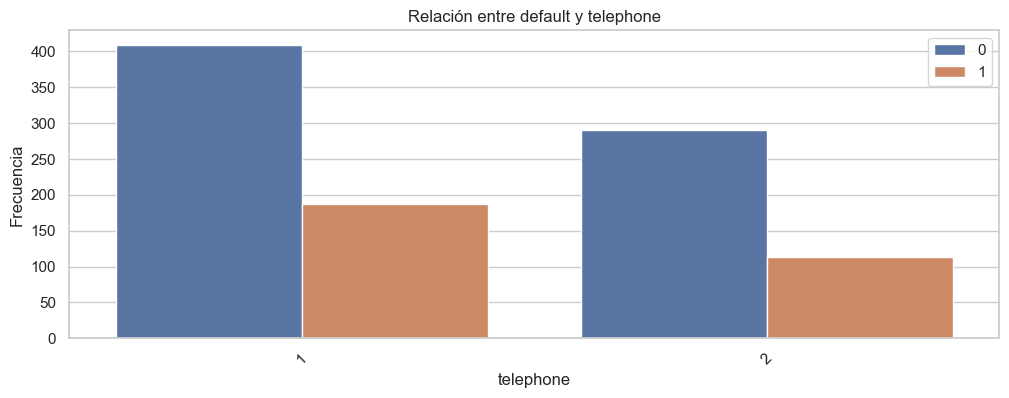

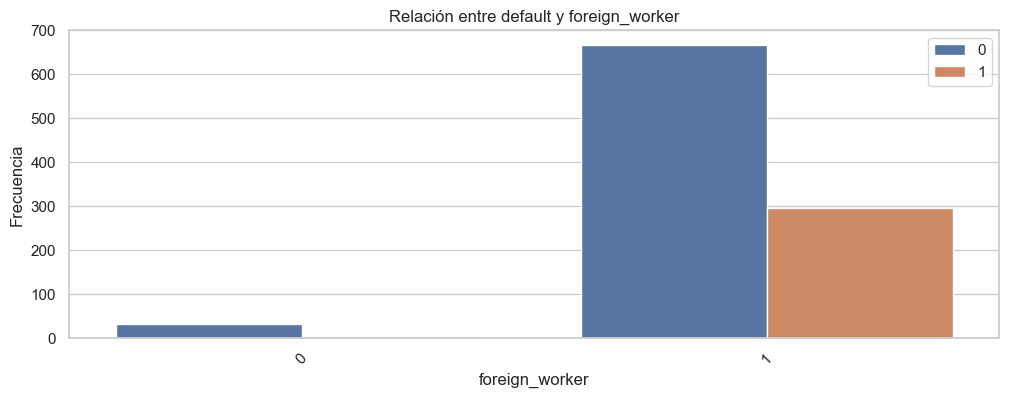

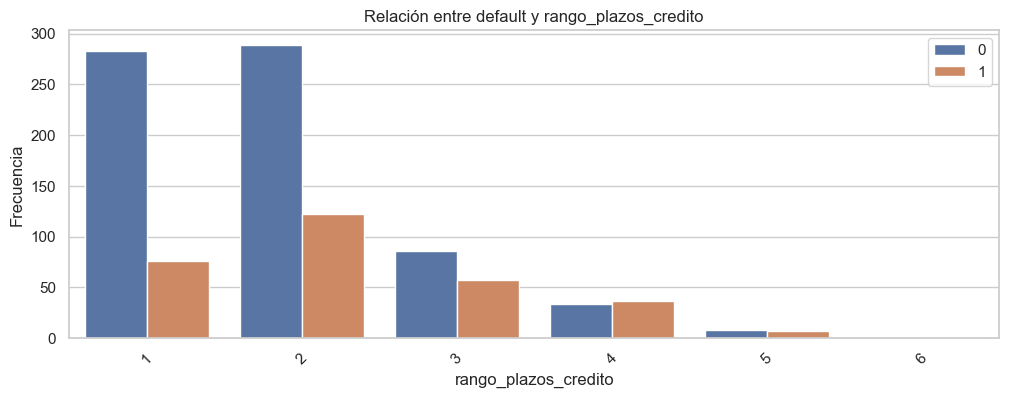

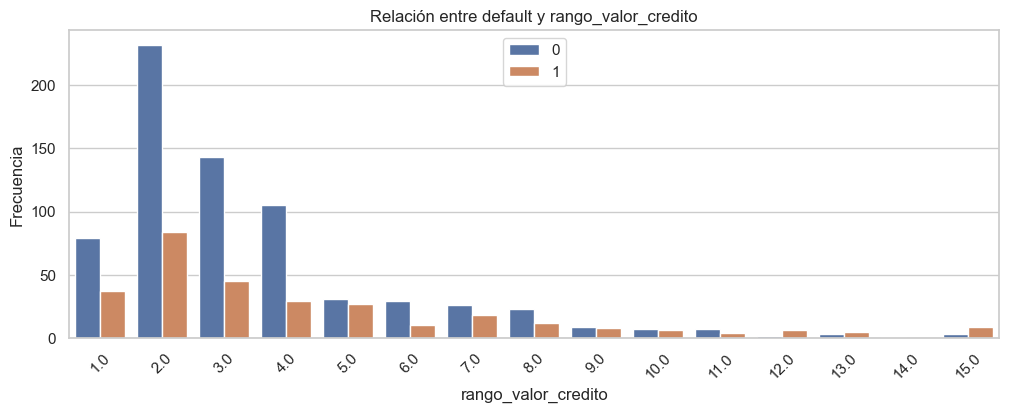

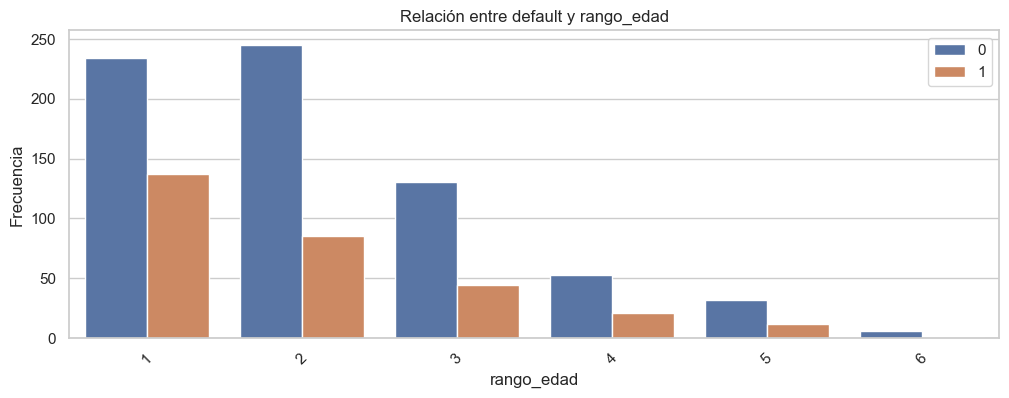

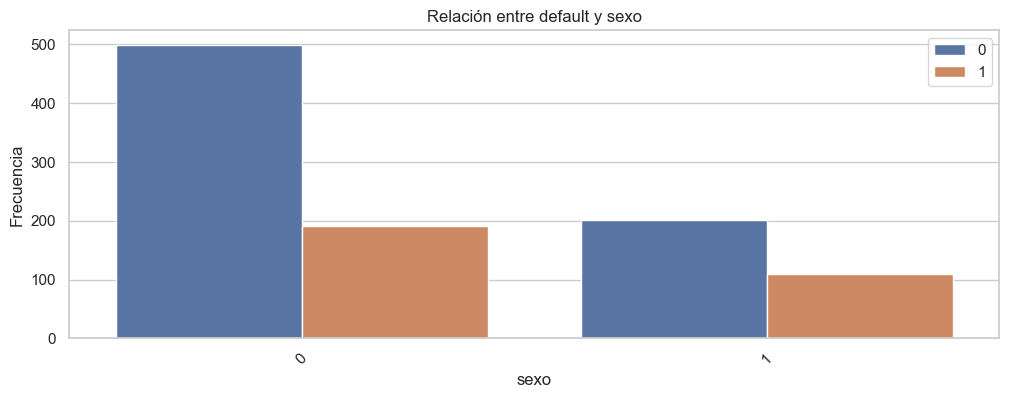

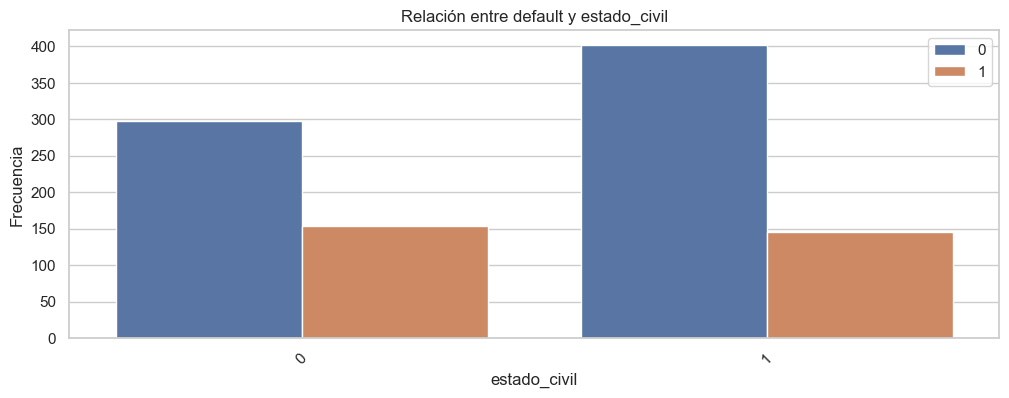

In [59]:
## Relacion de la variable 'default', con las demas variables numéricas. Gráfica de barras
for var in variables:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=var, hue='default', data=df_banco)
    plt.title(f'Relación entre default y {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

### <ins>Relación entre Variable target y Variables Numéricas - Scatter Plot</ins>

***************************************************************************
***************************************************************************
[[ 1.         -0.35084748]
 [-0.35084748  1.        ]]


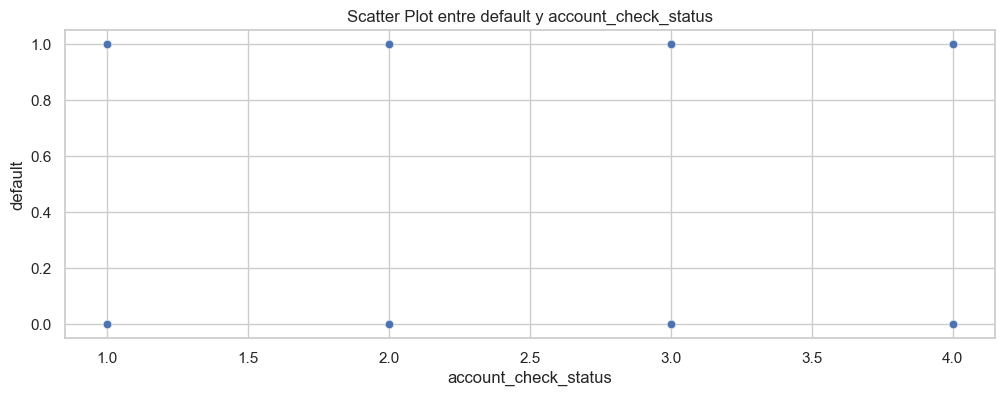

***************************************************************************
***************************************************************************
[[ 1.         -0.22878473]
 [-0.22878473  1.        ]]


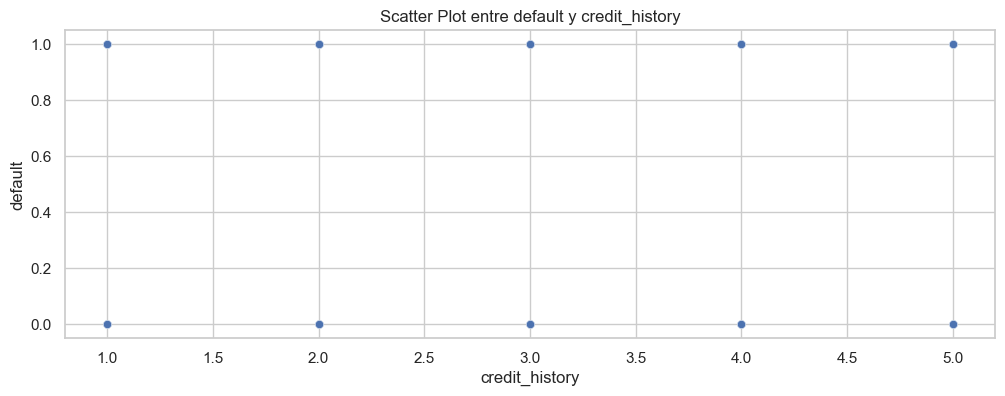

***************************************************************************
***************************************************************************
[[1.         0.00151433]
 [0.00151433 1.        ]]


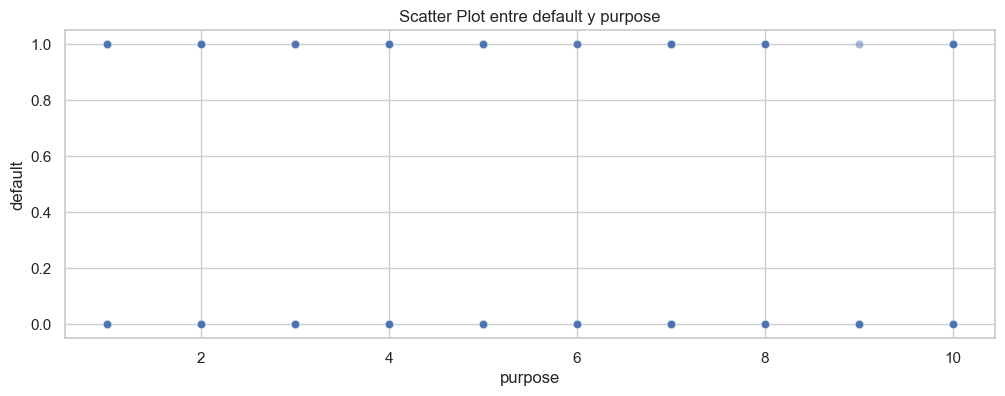

***************************************************************************
***************************************************************************
[[1.         0.17894274]
 [0.17894274 1.        ]]


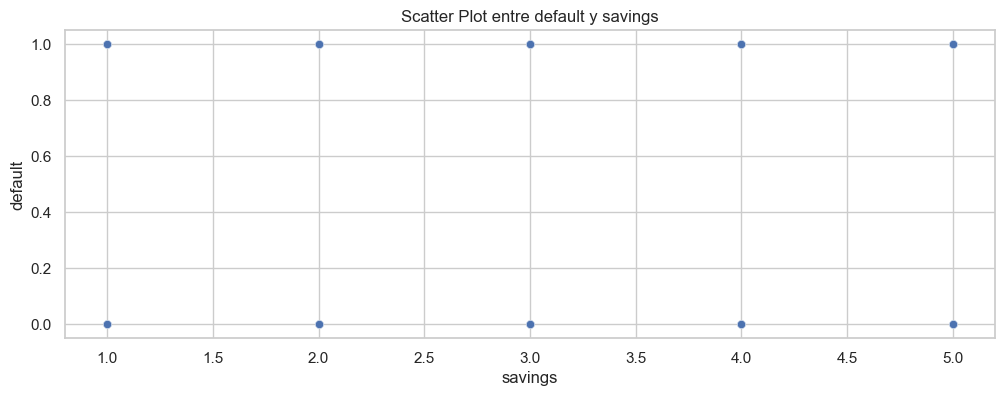

***************************************************************************
***************************************************************************
[[1.         0.11600204]
 [0.11600204 1.        ]]


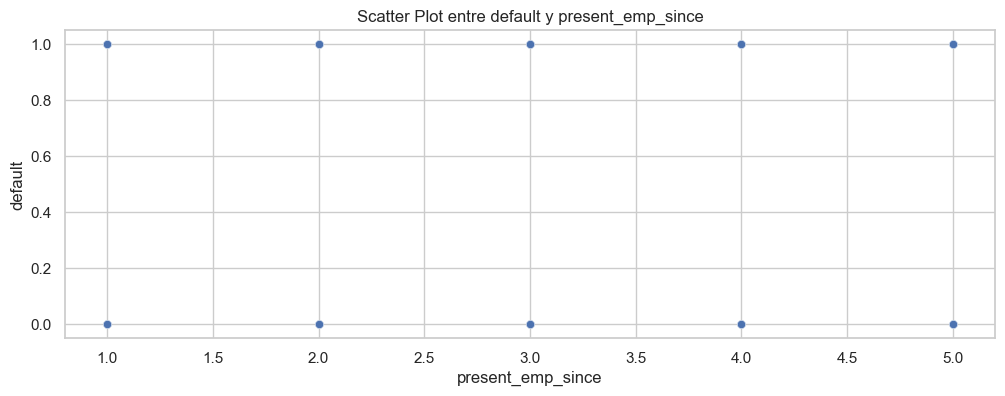

***************************************************************************
***************************************************************************
[[1.         0.07240394]
 [0.07240394 1.        ]]


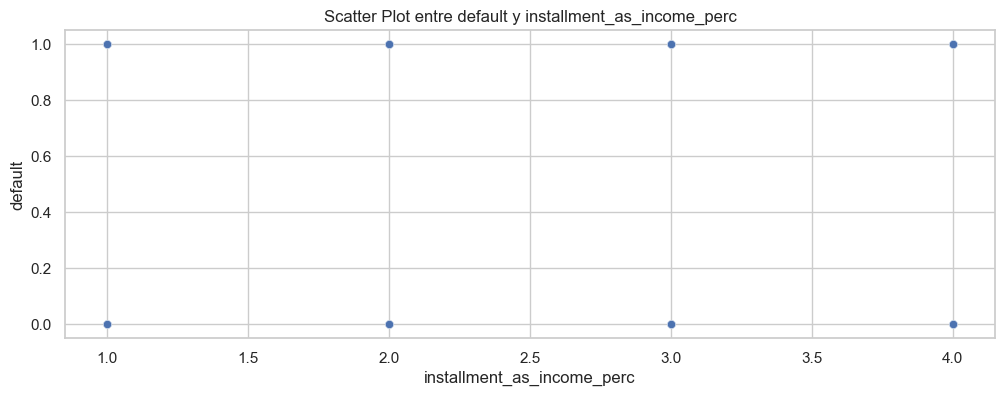

***************************************************************************
***************************************************************************
[[ 1.         -0.02513677]
 [-0.02513677  1.        ]]


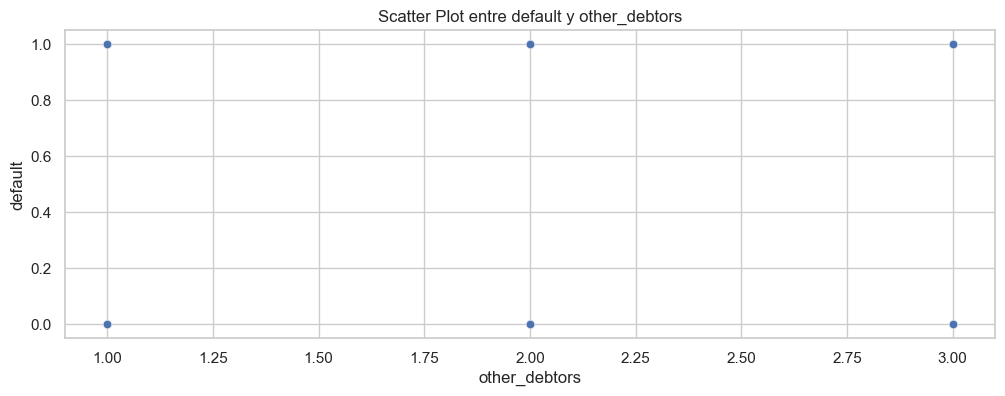

***************************************************************************
***************************************************************************
[[1.         0.00296716]
 [0.00296716 1.        ]]


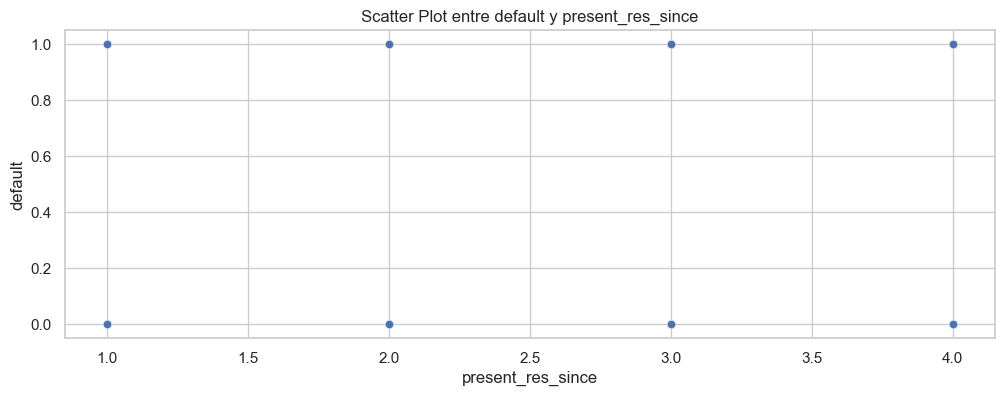

***************************************************************************
***************************************************************************
[[1.         0.14261197]
 [0.14261197 1.        ]]


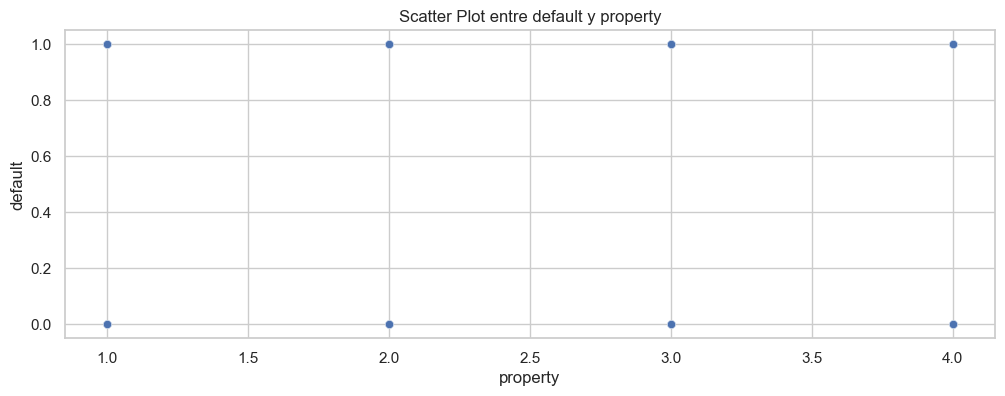

***************************************************************************
***************************************************************************
[[ 1.        -0.1098441]
 [-0.1098441  1.       ]]


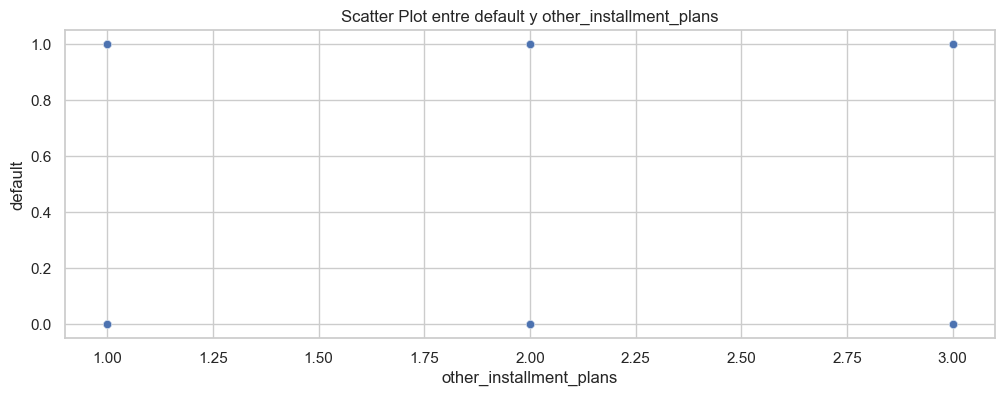

***************************************************************************
***************************************************************************
[[ 1.         -0.01931502]
 [-0.01931502  1.        ]]


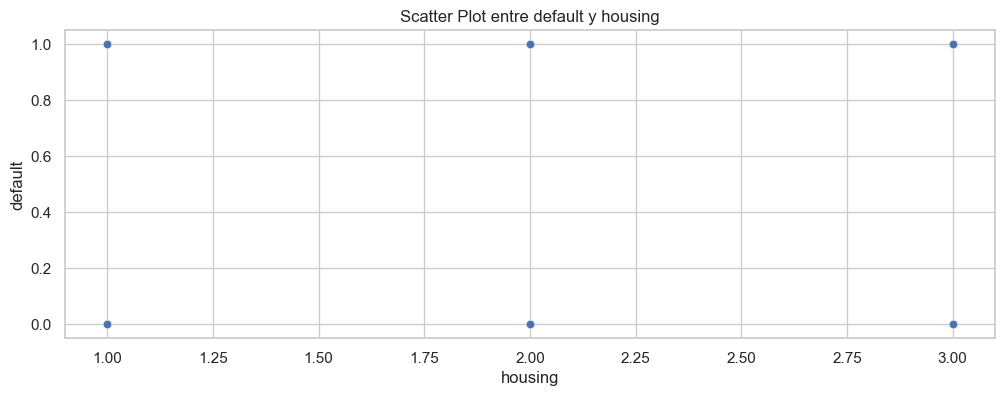

***************************************************************************
***************************************************************************
[[ 1.         -0.04573249]
 [-0.04573249  1.        ]]


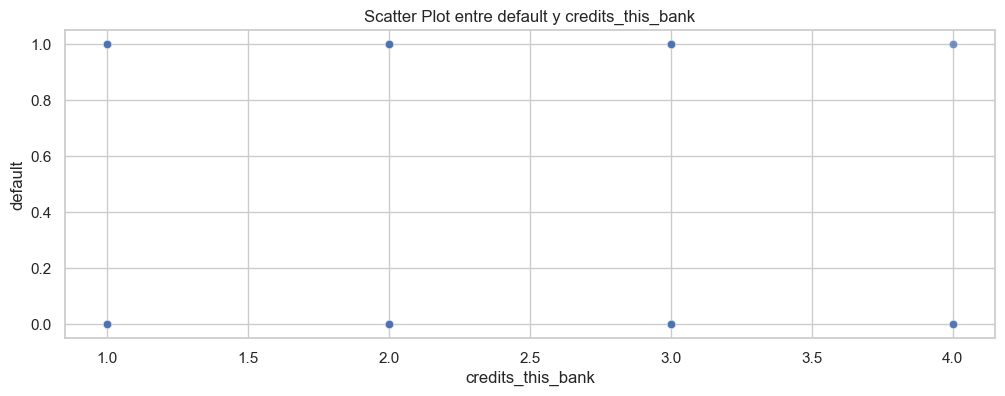

***************************************************************************
***************************************************************************
[[1.       0.032735]
 [0.032735 1.      ]]


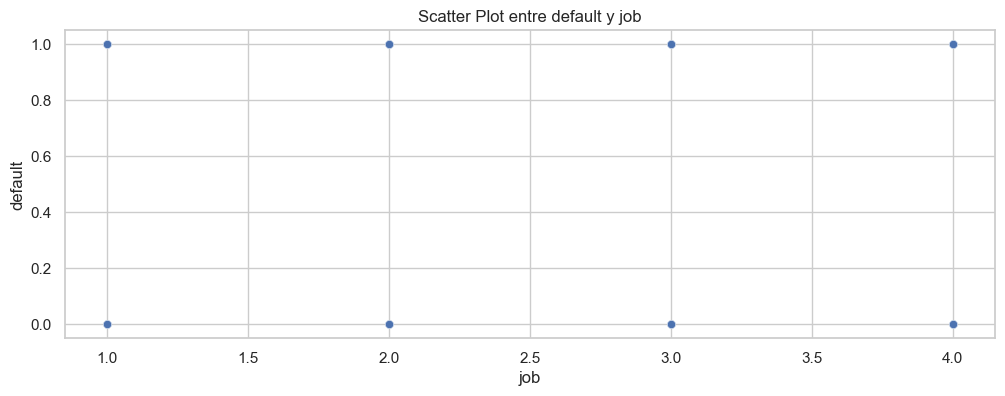

***************************************************************************
***************************************************************************
[[ 1.         -0.00301485]
 [-0.00301485  1.        ]]


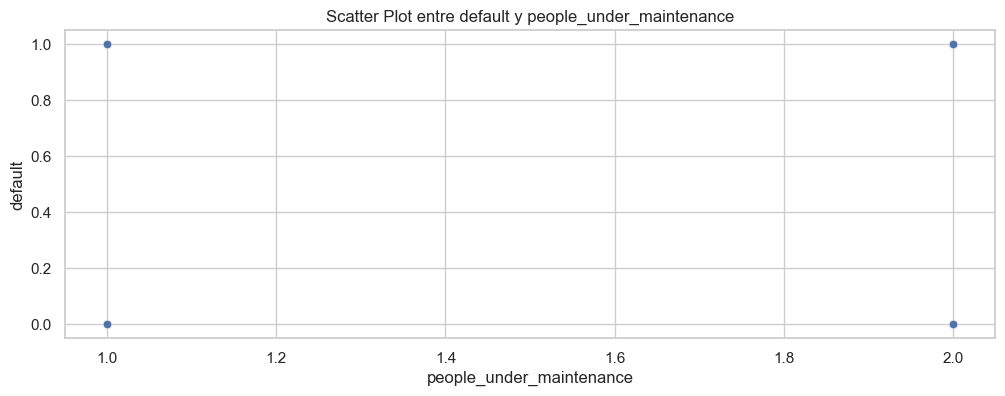

***************************************************************************
***************************************************************************
[[ 1.         -0.03646619]
 [-0.03646619  1.        ]]


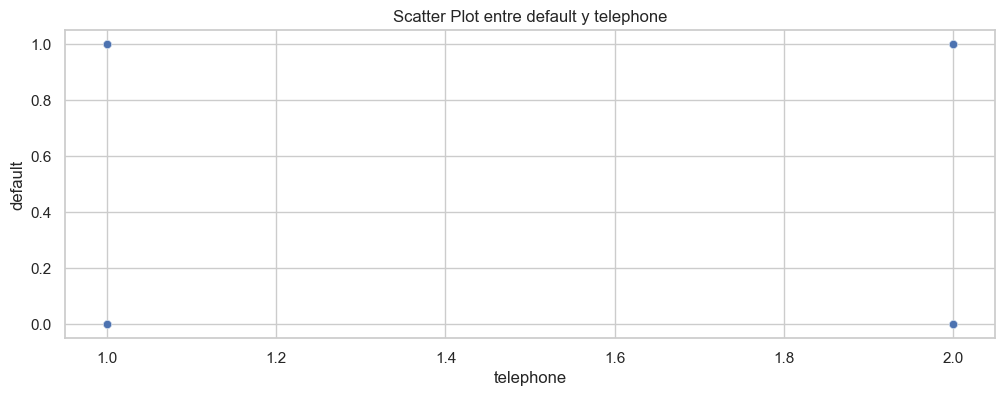

***************************************************************************
***************************************************************************
[[1.        0.0820795]
 [0.0820795 1.       ]]


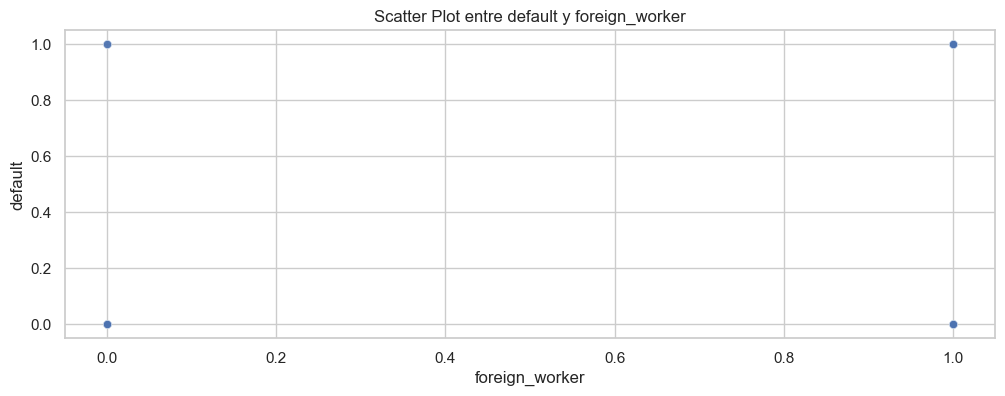

***************************************************************************
***************************************************************************
[[1.         0.19732109]
 [0.19732109 1.        ]]


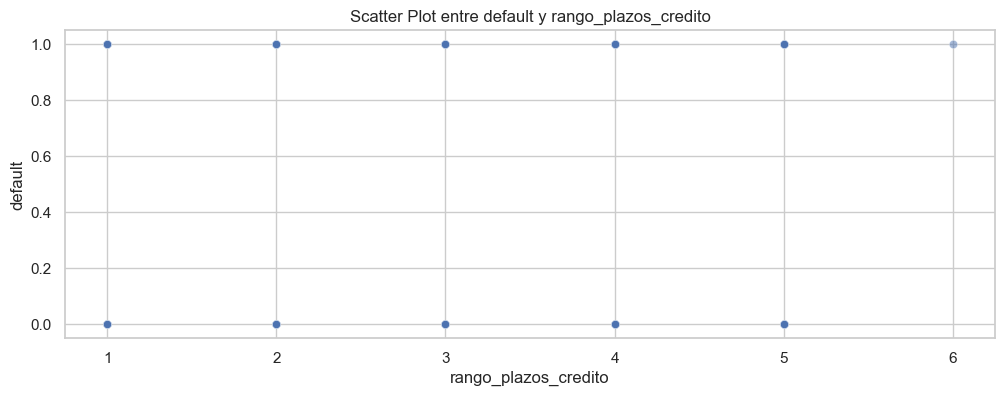

***************************************************************************
***************************************************************************
[[1.         0.15174159]
 [0.15174159 1.        ]]


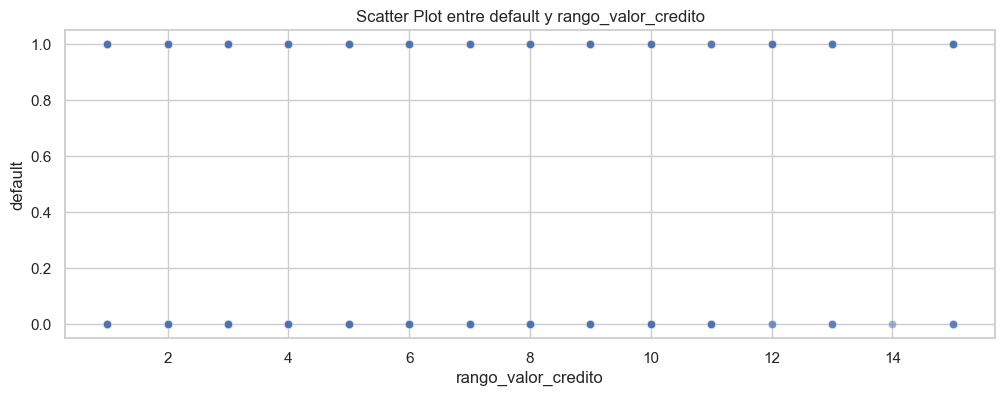

***************************************************************************
***************************************************************************
[[ 1.         -0.08361429]
 [-0.08361429  1.        ]]


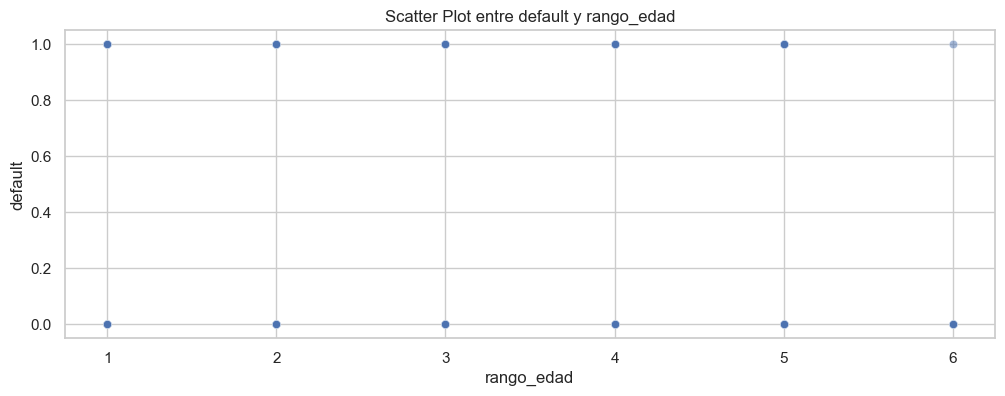

***************************************************************************
***************************************************************************
[[1.        0.0754927]
 [0.0754927 1.       ]]


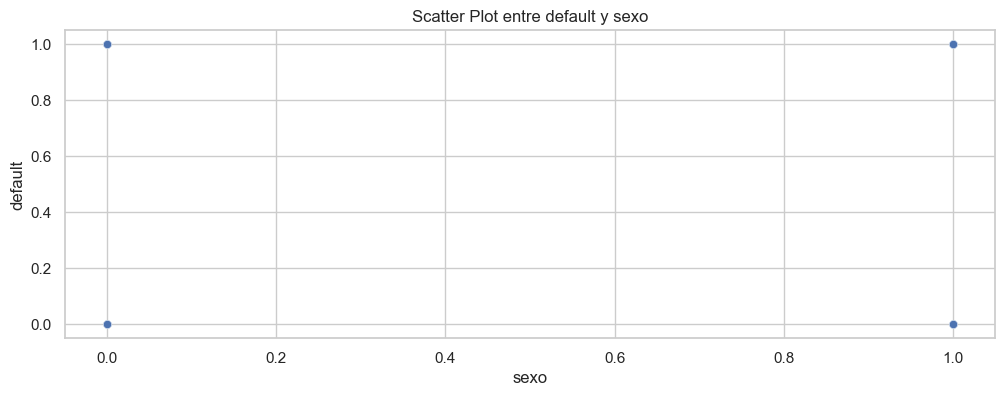

***************************************************************************
***************************************************************************
[[ 1.        -0.0806768]
 [-0.0806768  1.       ]]


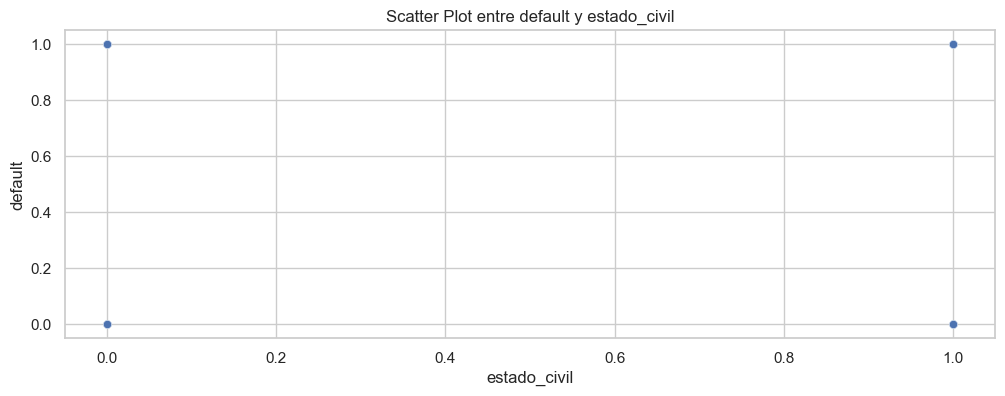

In [60]:
## Relacion de la variable 'is_promoted', con las demas variables numéricas. Gráfica scatter
for var in variables:
    print('***'*25)
    print('***'*25)
    print(np.corrcoef(df_banco[target],df_banco[var]))
    plt.figure(figsize=(12, 4))
    sns.scatterplot(data=df_banco, x=var, y=target, alpha=0.5)
    plt.title(f'Scatter Plot entre {target} y {var}')
    plt.show()

* Despues de realizar nuestro análisis Bivariado entre nuestras variables, podemos deducir que tenemos información para todo nuestro conjunto de categorias.

* Si notamos, que en el análisis Univariado, que hay categorías en las variables que se podrían considerar como atípicos. Pero tener en cuenta que ya habiamos discretizado previamente nuestras variables, el realizar demasiado ajuste podría no ser beneficioso para nuestro modelo. Decidimos continuar sin seguir modificando por el momento.



## 2.3 Análisis Multivariado

## 2.3.1 Correlación entre Variables

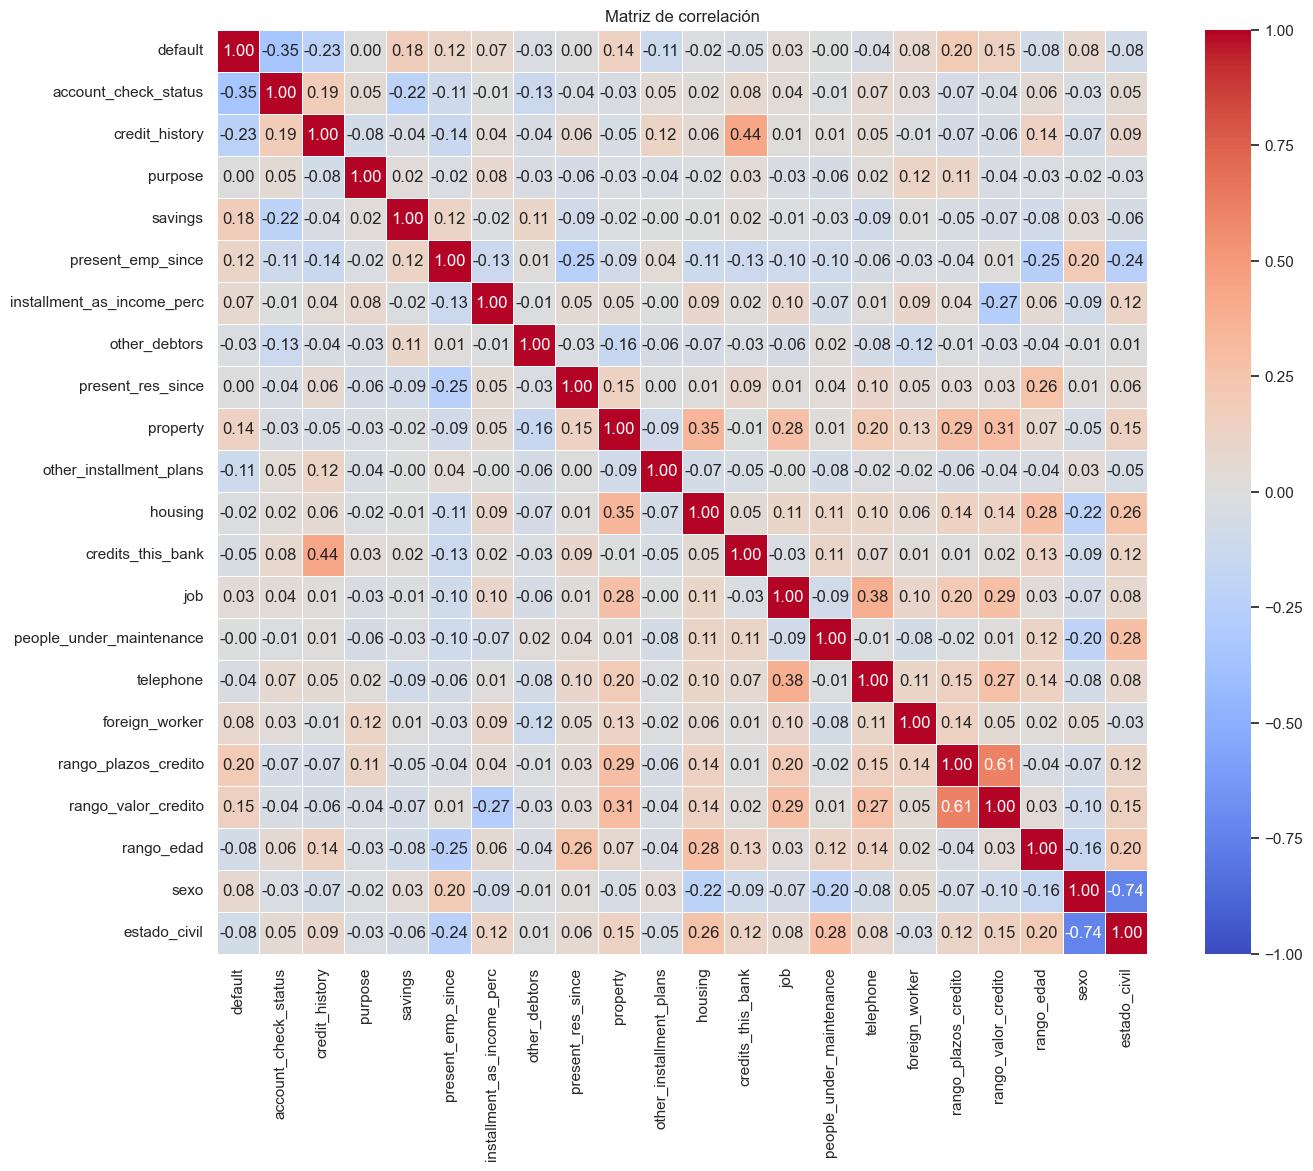

In [61]:
# Correlación entre variables
correlation_matrix = df_banco.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

Como primer análisis de nuestra Matriz de Correlación, podemos deducir que tenemos ciertas variables que se relacionan entre si, esto podría generarnos Multicolinealidad, lo cual puede ser perjudicial para nuestro modelo afectando los coeficientes del mismo.

Haremos un análisis variable a variable:

* **<ins>account_check_status:</ins>**: Tiene una correlación buena negativa con nuestra variable objetivo, mantendremos la variable.


* **<ins>credit_history:</ins>** Tiene buena correlación con variable objetivo, pero tambien tiene correlación con otra variable, se analizará su continuidad.


* **<ins>purpose:</ins>** La correlación con la variable objetivo es nula. Consideramos descartarla ya que como propósito de nuestro análisis deducimos que no es importante para la decisión de si nos aprueban un crédito ya que no interesa en que gastaría el dinero si no si soy capaz de pagarlo.


* **<ins>saving:</ins>** Esta variable es importante al momento de decidir si nos aceptan el crédito debido a que poseemos respaldo para pagarlo. La correlación con la variable objetivo es baja pero mejor que de muchas otras variables. No se correlaciona con otras variables.


* **<ins>present_emp_since:</ins>** Consideramos es importante saber desde cuando se da la presencia de la persona en la empresa, como respaldo y garantia de pago. Correlación baja con variable objetivo pero aceptable. No se correlaciona con otras variables.


* **<ins>installment_as_income_perc:</ins>** Podemos dejarlo, debido a que puede ser importante conocer la tasa de acuerdo al ingreso que posee.


* **<ins>other_debtors:</ins>** Consideramos que es importante ya que puede garantizar de que la persona pueda pagar el crédito si hubiera algún inconveniente. No se correlaciona con otras variables.


* **<ins>present_res_since:</ins>** Tiene una correlación nula con la variable objetivo. Consideramos descartarla debido a que no es importante saber desde cuando se vive en una residencia, tenemos otra variable que nos da una información parecida que es Housing.


* **<ins>property:</ins>** La correlación con variable objetivo es baja, pero se considera debido a que es importante conocer que propiedades en general posee la persona con la finalidad de otorgar crédito. Tiene correlación con otras variables, se analizará luego las demás variables.


* **<ins>other_installment_plans:</ins>** La correlación es baja, pero se mantiene la variable ya que es importante para la decisión de crédito, ya que es necesario saber si se tiene otros planes de pago.


* **<ins>housing:</ins>** Correlación baja con variable objetivo, pero en general consideramos que si es importante como variable para decidir si se otorgará el crédito.


* **<ins>credits_this_bank:</ins>** Correlación baja con variable objetivo, y además se correlaciona con otras variables. Se considera el descarte debido a que ya tenemos otra variable que nos aporta mejor valor 'credit_history', y está más relacionada con target.


* **<ins>job:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>people_under_maintenance:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>telephone:</ins>** Correlación baja con variable objetivo. Consideramos no importante para análisis de decisión de otorgar crédito.


* **<ins>foreign_worker:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>rango_plazos_credito:</ins>** Es una variable que tiene buena correlación con la variable objetivo. Es cierto tambien que tiene una alta correlación con otra variable **'rango_valor_credito'**, pero esta variable es importante al momento de tomar decisiones para nuestro análisis. Procedemos a dejarlo por más que tenga mucha correlación.


* **<ins>rango_valor_credito:</ins>** Es una variable que tiene buena correlación con la variable objetivo. Es cierto tambien que tiene una alta correlación con otra variable **'rango_plazos_credito'**, pero esta variable es importante al momento de tomar decisiones para nuestro análisis. Procedemos a dejarlo por más que tenga mucha correlación.


* **<ins>rango_edad:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>sexo:</ins>** Correlación baja con la variable objetivo. Es el que está más correlacionado con otra variable **'estado_civil'**. Consideramos el descarte de esta variable ya que consideramos que no interesa el sexo si no la capacidad de dinero de la persona. Por otro lado el estado civil lo consideramos importante ya que una persona casada podría tener más gastos y eso podría generar que no tenga poder adquisitivo suficiente para poder pagar el crédito.


* **<ins>estado_civil:</ins>** Correlación baja con la variable objetivo. Es el que está más correlacionado con otra variable **'sexo'**. Consideramos mantener esta variable y descartar la otra. Todo esto debido a que el estado civil lo consideramos importante ya que una persona casada podría tener más gastos y eso podría generar que no tenga poder adquisitivo suficiente para poder pagar el crédito.

In [62]:
## Observamos solo la correlación con el target
corr = df_banco.corr()
corr[['default']].sort_values(by='default',ascending=False).style.background_gradient()

,default
default,1.000000
rango_plazos_credito,0.197321
savings,0.178943
rango_valor_credito,0.151742
property,0.142612
present_emp_since,0.116002
foreign_worker,0.082079
sexo,0.075493
installment_as_income_perc,0.072404
job,0.032735


In [63]:
## Cuadro de correlación mostrando de forma colorida los valores entre variables
corr = df_banco.corr()
corr.style.background_gradient()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,sexo,estado_civil
default,1.000000,-0.350847,-0.228785,0.001514,0.178943,0.116002,0.072404,-0.025137,0.002967,0.142612,-0.109844,-0.019315,-0.045732,0.032735,-0.003015,-0.036466,0.082079,0.197321,0.151742,-0.083614,0.075493,-0.080677
account_check_status,-0.350847,1.000000,0.192191,0.053223,-0.222867,-0.106339,-0.005280,-0.127737,-0.042234,-0.032260,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,0.026758,-0.069531,-0.042108,0.059144,-0.025578,0.052436
credit_history,-0.228785,0.192191,1.000000,-0.081634,-0.039058,-0.138225,0.044375,-0.040676,0.063198,-0.053777,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,-0.013873,-0.068134,-0.057103,0.136227,-0.071802,0.086008
purpose,0.001514,0.053223,-0.081634,1.000000,0.024072,-0.024990,0.078224,-0.032254,-0.062927,-0.031025,-0.039346,-0.019488,0.034958,-0.032655,-0.056450,0.018677,0.124317,0.109430,-0.035547,-0.027404,-0.017271,-0.025536
savings,0.178943,-0.222867,-0.039058,0.024072,1.000000,0.120950,-0.021993,0.105069,-0.091424,-0.018948,-0.001908,-0.006505,0.021644,-0.011709,-0.027514,-0.087208,0.007095,-0.046870,-0.067415,-0.081796,0.034982,-0.060384
present_emp_since,0.116002,-0.106339,-0.138225,-0.024990,0.120950,1.000000,-0.126161,0.008116,-0.245081,-0.087187,0.040154,-0.111126,-0.125791,-0.101225,-0.097192,-0.060518,-0.027232,-0.039019,0.010728,-0.252367,0.197009,-0.238857
installment_as_income_perc,0.072404,-0.005280,0.044375,0.078224,-0.021993,-0.126161,1.000000,-0.011398,0.049302,0.053391,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,0.090024,0.043738,-0.269678,0.056466,-0.086302,0.118233
other_debtors,-0.025137,-0.127737,-0.040676,-0.032254,0.105069,0.008116,-0.011398,1.000000,-0.025678,-0.155450,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,-0.117999,-0.009469,-0.031527,-0.038214,-0.013359,0.006481
present_res_since,0.002967,-0.042234,0.063198,-0.062927,-0.091424,-0.245081,0.049302,-0.025678,1.000000,0.147231,0.002089,0.011941,0.089625,0.012655,0.042643,0.095359,0.054097,0.033841,0.032067,0.261250,0.013818,0.063639
property,0.142612,-0.032260,-0.053777,-0.031025,-0.018948,-0.087187,0.053391,-0.155450,0.147231,1.000000,-0.090033,0.345219,-0.007765,0.276149,0.011872,0.196802,0.132462,0.290379,0.308861,0.071904,-0.051455,0.145125


In [64]:
# sns.pairplot(df_banco)

## 2.3.2 VIF para detección de multicolinealidad:

**VIF** - Factor de Inflación de la Varianza- El VIF mide la multicolinealidad entre las variables predictoras. Un VIF mayor indica una mayor multicolinealidad.

* Si bien es cierto que valores altos de VIF pueden indicar multicolinealidad, no necesariamente implica que debamos eliminar esas variables automáticamente. Usaremos esto como herramienta para que nos ayude a determinar si vamos por el camino correcto al eliminar ciertas variables, considerando si estás variables son o no importantes para nuestro análisis.

* Normalmente se considera que valores de VIF mayores de 10, son malos y generan multicolinealidad, pero tambien lo analizaremos con nuestra matriz de correlación y nuestro expertiz del negocio.

In [65]:
## Analizamos primero para todas nuestras variables menos la variable objetivo

X = df_banco.drop(columns=['default'])
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF para detección de multicolinealidad
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(X)
vif_result.style.background_gradient()

,Variable,VIF
0,account_check_status,5.689848
1,credit_history,15.486267
2,purpose,3.646975
3,savings,7.446907
4,present_emp_since,6.071848
5,installment_as_income_perc,10.067531
6,other_debtors,6.535912
7,present_res_since,8.626305
8,property,8.464266
9,other_installment_plans,14.335426


* Observamos que según este análisis, **muchas variables tienes valores de VIF elevados, mayores de 10**. Esto nos indica que podrían afectar a nuestro modelo **generando multicolinealidad** y por ende afectando nuestros coeficientes del modelo.


* Ahora bien, tambien tenemos que notar que **algunas variables con VIF elevados** son **importantes para nuestros análisis**, según lo deducido previamente con nuestra matriz de correlación.


* Lo que realizaremos será el descarte de ciertas variables, que consideramos no importantes para nuestro análisis. Estas variables elegidas son: **['purpose','credits_this_bank', 'sexo', 'telephone', 'present_res_since']**

In [66]:
## Ahora analizamos con nuestras variables ya eliminadas

X = df_banco.drop(columns=['default','purpose','credits_this_bank', 'sexo', 'telephone', 'present_res_since'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF para detección de multicolinealidad
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(X)
vif_result.style.background_gradient()

,Variable,VIF
0,account_check_status,5.572781
1,credit_history,12.132360
2,savings,7.327697
3,present_emp_since,5.911627
4,installment_as_income_perc,9.954497
5,other_debtors,6.464158
6,property,8.142708
7,other_installment_plans,14.015535
8,housing,17.739843
9,job,22.380021


* Observamos que ciertos valores de VIF se modificaron, bajaron en magnitud. Esto es bueno ya que nos indica que estas variables que descartamos no nos aportaban valor y nos generaban cierta multicolinealidad. 


* Ahora bien, siguen estando ciertos valores de VIF altos para algunas variables, pero consideramos que esas variables son importantes al momento de realizar un análisis para decidir si se da o no un crédito, por eso se decide continuar con estas variables.

In [67]:
## Generamos un nuevo dataframe, en el cual descartaremos estas variables que consideramos no nos aportan valor al modelo
df_banco_new = df_banco.drop(columns=['purpose','credits_this_bank', 'sexo', 'telephone', 'present_res_since'])
df_banco_new

,default,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,other_installment_plans,housing,job,people_under_maintenance,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,estado_civil
0,0,1,5,1,1,4,1,1,3,2,3,1,1,1,2.0,5,1
1,1,2,3,5,3,2,1,1,3,2,3,1,1,4,6.0,1,0
2,0,4,5,5,2,2,1,1,3,2,2,2,1,1,3.0,3,1
3,0,1,3,5,2,2,3,2,3,3,3,2,1,4,8.0,3,1
4,1,1,4,5,3,3,1,4,3,3,3,2,1,2,5.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,5,2,3,1,1,3,2,2,1,1,1,2.0,2,0
996,0,1,3,5,3,4,1,2,3,2,4,1,1,3,4.0,3,0
997,0,4,3,5,1,4,1,3,3,2,3,1,1,1,1.0,2,1
998,1,1,3,5,3,4,1,4,3,3,3,1,1,4,2.0,1,1


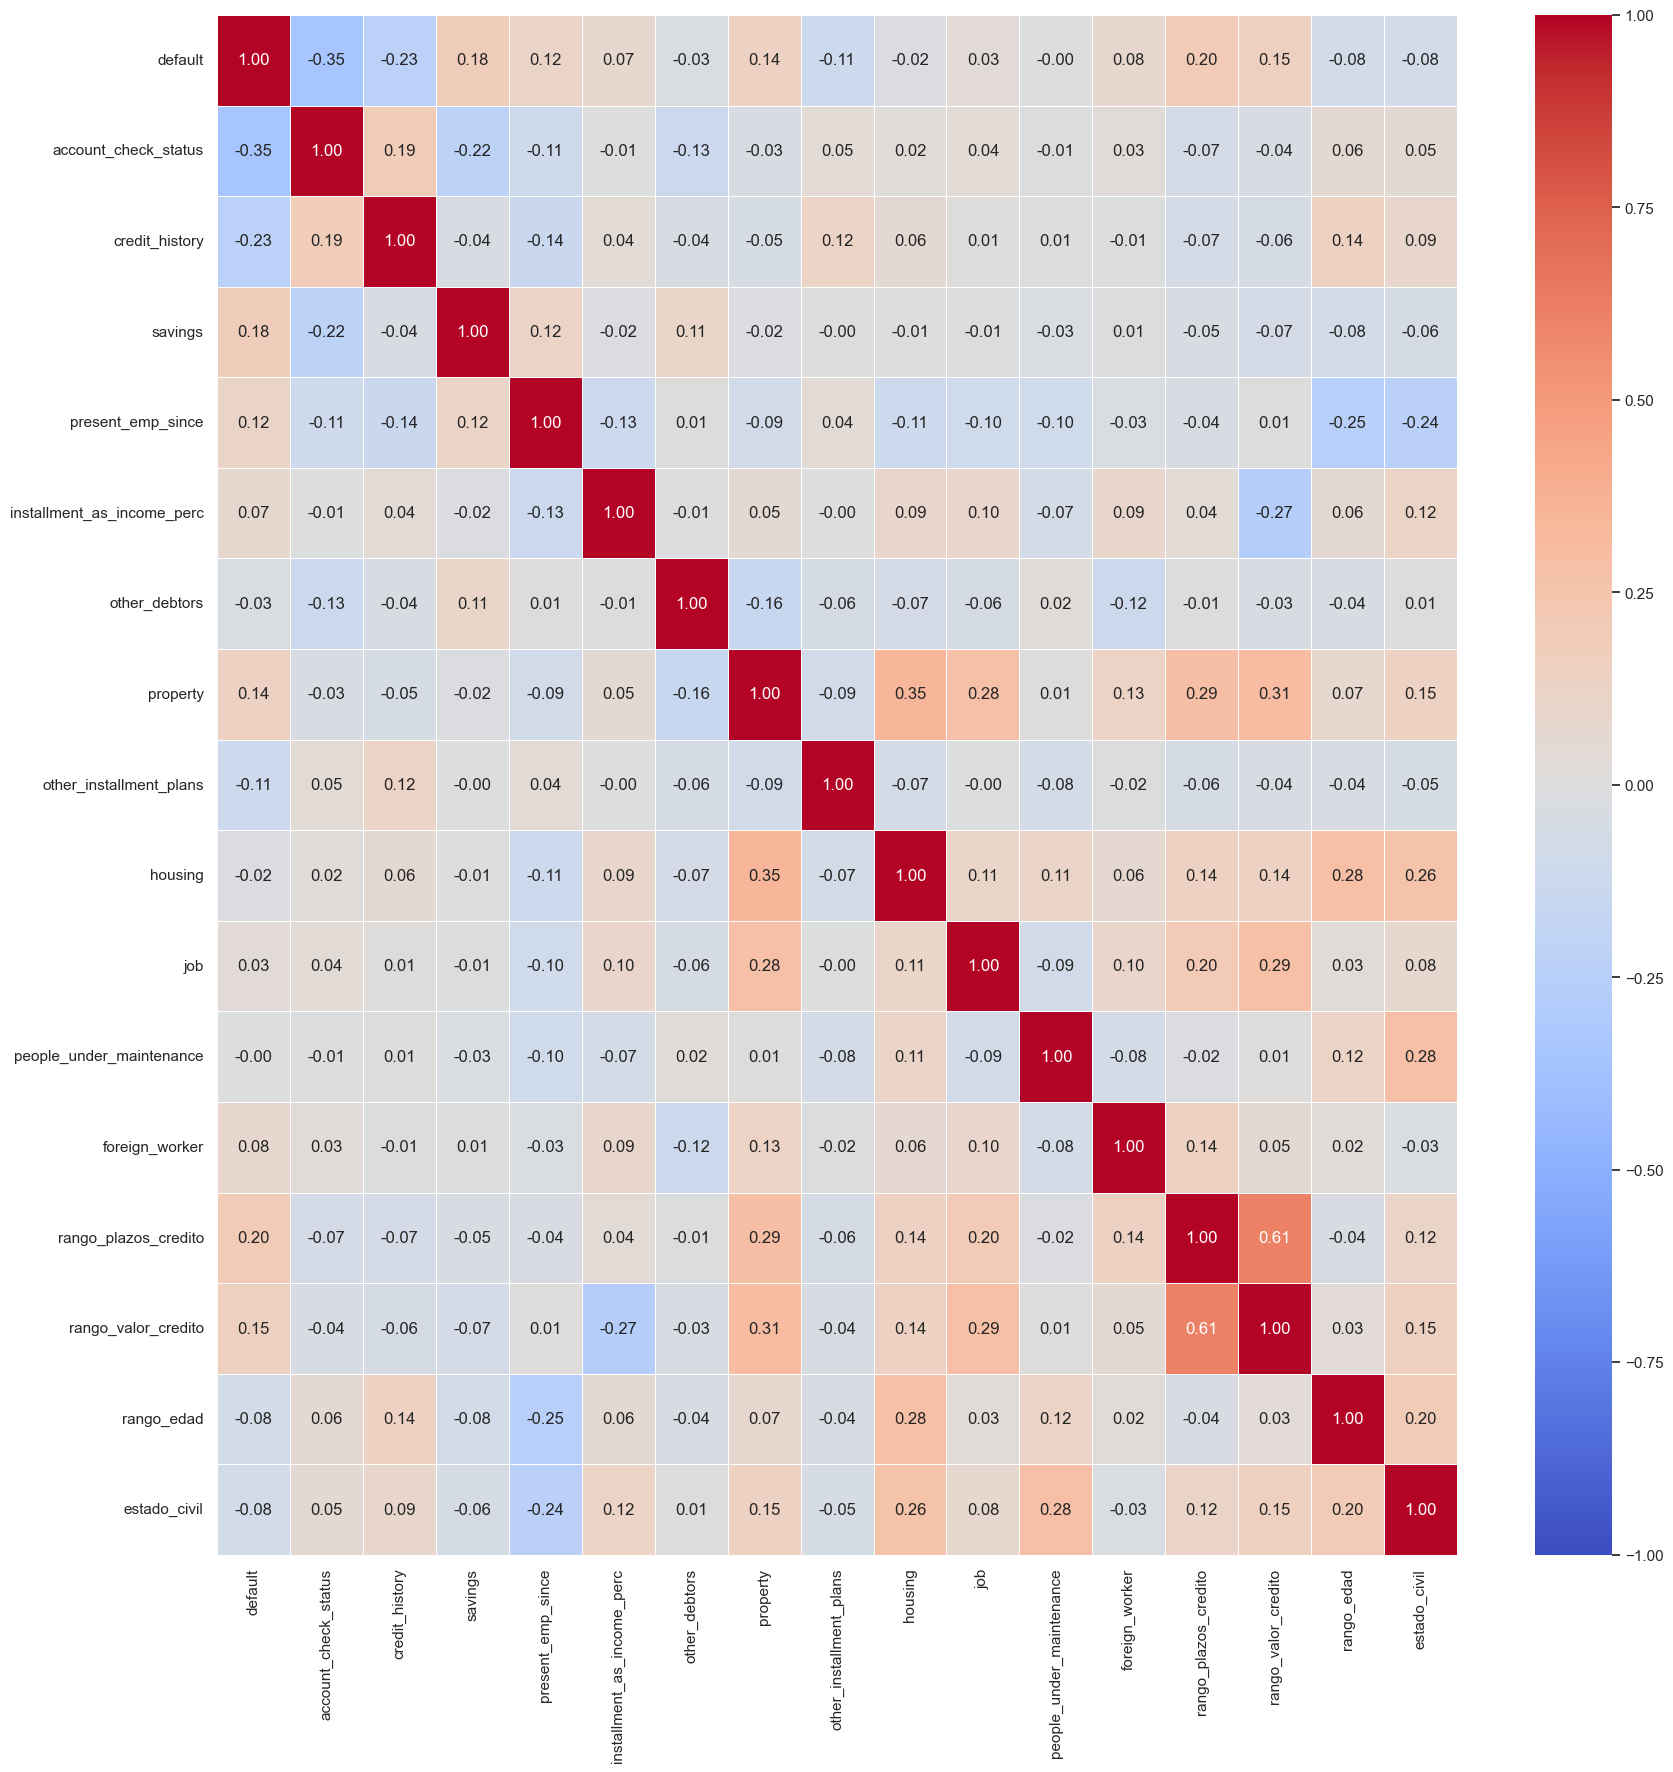

In [68]:
## Generamos nuestra matriz de correlación para este nuevo conjunto de datos ajustado y mejorado
sns.heatmap(df_banco_new.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

* Notamos que ciertas variables mantienen una correlación media baja, pero consideramos que son importantes para el análisis de nuestros modelos.


* Decidimos continuar con este nuevo conjunto de datos, los resultados se verán al momento de obtener los parámetros de nuestros modelos generados.

# 3. Construcción de los Modelos

In [69]:
## Separando nuestros datos en prueba y entrenamiento
y = df_banco_new['default']
x = df_banco_new.drop(columns='default')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 77)

In [70]:
x_train.head()

,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,other_installment_plans,housing,job,people_under_maintenance,foreign_worker,rango_plazos_credito,rango_valor_credito,rango_edad,estado_civil
184,2,5,5,1,4,1,3,1,2,3,2,1,2,1.0,2,1
434,1,3,5,3,3,1,1,3,2,3,1,1,1,3.0,1,1
577,4,5,1,3,3,1,3,3,2,3,1,1,2,2.0,2,0
433,4,5,5,3,4,1,1,3,2,3,1,1,2,3.0,2,0
87,2,3,4,3,1,1,4,3,3,3,2,1,3,13.0,3,1


In [71]:
y_train.head()

184    1
434    0
577    0
433    0
87     1
Name: default, dtype: int64

In [72]:
## Validando las dimensiones de nuestros datos a analizar
x_train.shape, y_train.shape

((700, 16), (700,))

In [73]:
## Validando las dimensiones de nuestros datos a analizar
x_test.shape, y_test.shape

((300, 16), (300,))

## Estandarización de datos 

In [74]:
standarscaler = StandardScaler()

In [75]:
standarscaler.fit(x_train)

StandardScaler()

In [76]:
x_train_scaled = standarscaler.transform(x_train)
x_test_scaled = standarscaler.transform(x_test)

In [77]:
pd.DataFrame(x_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.438898,1.329526,0.712004,-1.312270,0.929207,-0.291554,0.622892,-2.298946,0.114720,0.131869,2.315953,0.196407,0.013293,-1.015471,-0.127594,0.920307
1,-1.236894,-0.498899,0.712004,0.306389,0.035739,-0.291554,-1.281145,0.475644,0.114720,0.131869,-0.431788,0.196407,-1.020579,-0.286789,-0.970195,0.920307
2,1.157094,1.329526,-1.783129,0.306389,0.035739,-0.291554,0.622892,0.475644,0.114720,0.131869,-0.431788,0.196407,0.013293,-0.651130,-0.127594,-1.086593
3,1.157094,1.329526,0.712004,0.306389,0.929207,-0.291554,-1.281145,0.475644,0.114720,0.131869,-0.431788,0.196407,0.013293,-0.286789,-0.127594,-1.086593
4,-0.438898,-0.498899,0.088221,0.306389,-1.751197,-0.291554,1.574911,0.475644,2.026717,0.131869,2.315953,0.196407,1.047165,3.356625,0.715007,0.920307


In [78]:
pd.DataFrame(x_test_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.236894,1.329526,0.088221,-1.312270,0.035739,4.193898,-1.281145,0.475644,0.114720,0.131869,2.315953,-5.091471,-1.020579,-0.651130,0.715007,0.920307
1,-0.438898,-0.498899,0.712004,-0.502941,0.035739,-0.291554,-1.281145,0.475644,-1.797278,-1.381387,-0.431788,0.196407,0.013293,1.170577,-0.970195,0.920307
2,-0.438898,-0.498899,-1.783129,-1.312270,0.929207,-0.291554,1.574911,-2.298946,2.026717,0.131869,-0.431788,0.196407,0.013293,-0.286789,-0.127594,0.920307
3,-1.236894,-1.413111,0.712004,1.925048,-1.751197,1.951172,1.574911,0.475644,-1.797278,-2.894643,-0.431788,0.196407,0.013293,-0.651130,-0.970195,-1.086593
4,0.359098,-0.498899,0.712004,-1.312270,0.929207,-0.291554,0.622892,0.475644,0.114720,0.131869,-0.431788,0.196407,1.047165,0.441894,-0.127594,0.920307


## 3.1 Regresión Logística 

In [79]:
## Entrenando el modelo
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [80]:
y_pred = model.predict(x_test_scaled)

In [81]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.803279,0.678571,0.780000,0.740925,0.767529
recall,0.915888,0.441860,0.780000,0.678874,0.780000
f1-score,0.855895,0.535211,0.780000,0.695553,0.763966
support,214.000000,86.000000,0.780000,300.000000,300.000000


In [82]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [83]:
## En este caso, sabemos que la clase 0 - Good costumer
## Por ende procedemos a calcular las métricas para esta clase
accuracy = accuracy_score(y_test, y_pred)
precision = report['Class 0']['precision']
recall = report['Class 0']['recall']
f1 = report['Class 0']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_regresion_logistica = []
metricas_regresion_logistica.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.78
Precision: 0.8032786885245902
Recall: 0.9158878504672897
F1-score: 0.8558951965065501
AUC-ROC: 0.7977070202129972


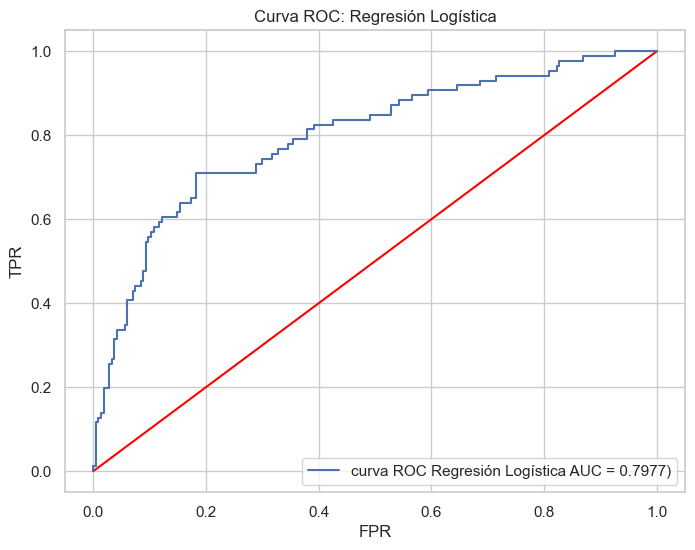

In [84]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Regresión Logística AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Regresión Logística')
plt.legend(loc = 'lower right')

## 3.2 Árbol de Decisión 

In [85]:
## Entrenando el modelo
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = model.predict(x_test_scaled)

In [87]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.801843,0.518072,0.723333,0.659958,0.720496
recall,0.813084,0.500000,0.723333,0.656542,0.723333
f1-score,0.807425,0.508876,0.723333,0.658150,0.721841
support,214.000000,86.000000,0.723333,300.000000,300.000000


In [88]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [89]:
## En este caso, sabemos que la clase 0 - Good costumer
## Por ende procedemos a calcular las métricas para esta clase
accuracy = accuracy_score(y_test, y_pred)
precision = report['Class 0']['precision']
recall = report['Class 0']['recall']
f1 = report['Class 0']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_arbol_decision = []
metricas_arbol_decision.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.7233333333333334
Precision: 0.8018433179723502
Recall: 0.8130841121495327
F1-score: 0.8074245939675174
AUC-ROC: 0.661269289284938


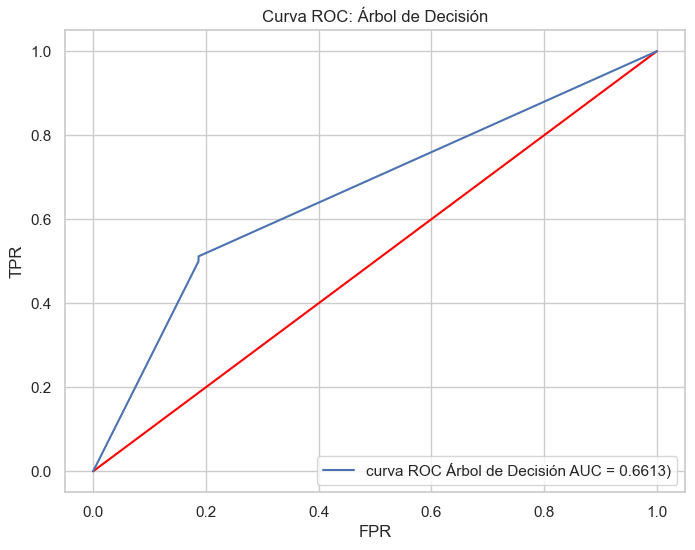

In [90]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Árbol de Decisión AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Árbol de Decisión')
plt.legend(loc = 'lower right')

## 3.3 Random Forest 

In [91]:
## Entrenando el modelo
model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [92]:
y_pred = model.predict(x_test_scaled)

In [93]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.800000,0.720000,0.786667,0.760000,0.777067
recall,0.934579,0.418605,0.786667,0.676592,0.786667
f1-score,0.862069,0.529412,0.786667,0.695740,0.766707
support,214.000000,86.000000,0.786667,300.000000,300.000000


In [94]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [95]:
## En este caso, sabemos que la clase 0 - Good costumer
## Por ende procedemos a calcular las métricas para esta clase
accuracy = accuracy_score(y_test, y_pred)
precision = report['Class 0']['precision']
recall = report['Class 0']['recall']
f1 = report['Class 0']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_random_forest = []
metricas_random_forest.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.7866666666666666
Precision: 0.8
Recall: 0.9345794392523364
F1-score: 0.8620689655172415
AUC-ROC: 0.7900184742447294


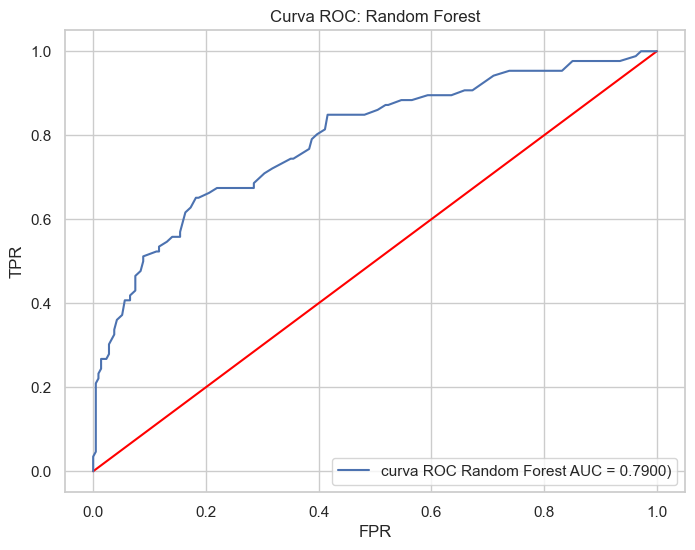

In [96]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Random Forest AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Random Forest')
plt.legend(loc = 'lower right')

## 3.4 Naive Bayes 

In [97]:
## Entrenando el modelo
model = GaussianNB()
model.fit(x_train_scaled, y_train)

GaussianNB()

In [98]:
y_pred = model.predict(x_test_scaled)

In [99]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.822430,0.558140,0.746667,0.690285,0.746667
recall,0.822430,0.558140,0.746667,0.690285,0.746667
f1-score,0.822430,0.558140,0.746667,0.690285,0.746667
support,214.000000,86.000000,0.746667,300.000000,300.000000


In [100]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [101]:
## En este caso, sabemos que la clase 0 - Good costumer
## Por ende procedemos a calcular las métricas para esta clase
accuracy = accuracy_score(y_test, y_pred)
precision = report['Class 0']['precision']
recall = report['Class 0']['recall']
f1 = report['Class 0']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_naive_bayes = []
metricas_naive_bayes.extend([accuracy,precision,recall,f1,auc_roc])
print(metricas_regresion_logistica)
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

[0.78, 0.8032786885245902, 0.9158878504672897, 0.8558951965065501, 0.7977070202129972]
Accuracy: 0.7466666666666667
Precision: 0.822429906542056
Recall: 0.822429906542056
F1-score: 0.822429906542056
AUC-ROC: 0.7773853510106498


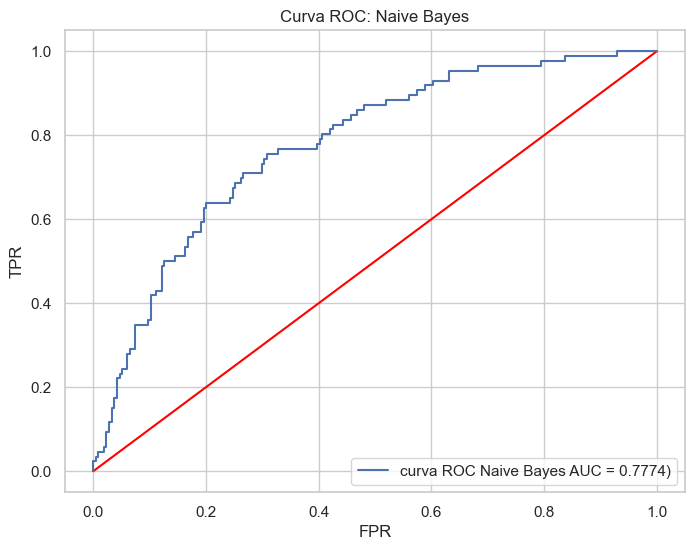

In [102]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Naive Bayes AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Naive Bayes')
plt.legend(loc = 'lower right')
plt.show()

# 3.5 Agrupando Métricas - Comparando los modelos

In [103]:
modelos = ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'Naive Bayes']
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

In [104]:
## Creando el cuadro comparativo de métricas para nuestros modelos evaluados
comparativo_metricas = pd.DataFrame({
    'Métricas': metricas,
     modelos[0]: metricas_regresion_logistica,
     modelos[1]: metricas_arbol_decision,
     modelos[2]: metricas_random_forest,
     modelos[3]: metricas_naive_bayes
})
comparativo_metricas.style.background_gradient()

,Métricas,Regresión Logística,Árbol de Decisión,Random Forest,Naive Bayes
0,Accuracy,0.780000,0.723333,0.786667,0.746667
1,Precision,0.803279,0.801843,0.800000,0.822430
2,Recall,0.915888,0.813084,0.934579,0.822430
3,F1-Score,0.855895,0.807425,0.862069,0.822430
4,AUC,0.797707,0.661269,0.790018,0.777385


In [105]:
## Cambiamos de un formato ancho a uno largo para poder graficar de mejor manera nuestros datos
comparativo_metricas.melt(id_vars='Métricas').style.background_gradient()

,Métricas,variable,value
0,Accuracy,Regresión Logística,0.780000
1,Precision,Regresión Logística,0.803279
2,Recall,Regresión Logística,0.915888
3,F1-Score,Regresión Logística,0.855895
4,AUC,Regresión Logística,0.797707
5,Accuracy,Árbol de Decisión,0.723333
6,Precision,Árbol de Decisión,0.801843
7,Recall,Árbol de Decisión,0.813084
8,F1-Score,Árbol de Decisión,0.807425
9,AUC,Árbol de Decisión,0.661269


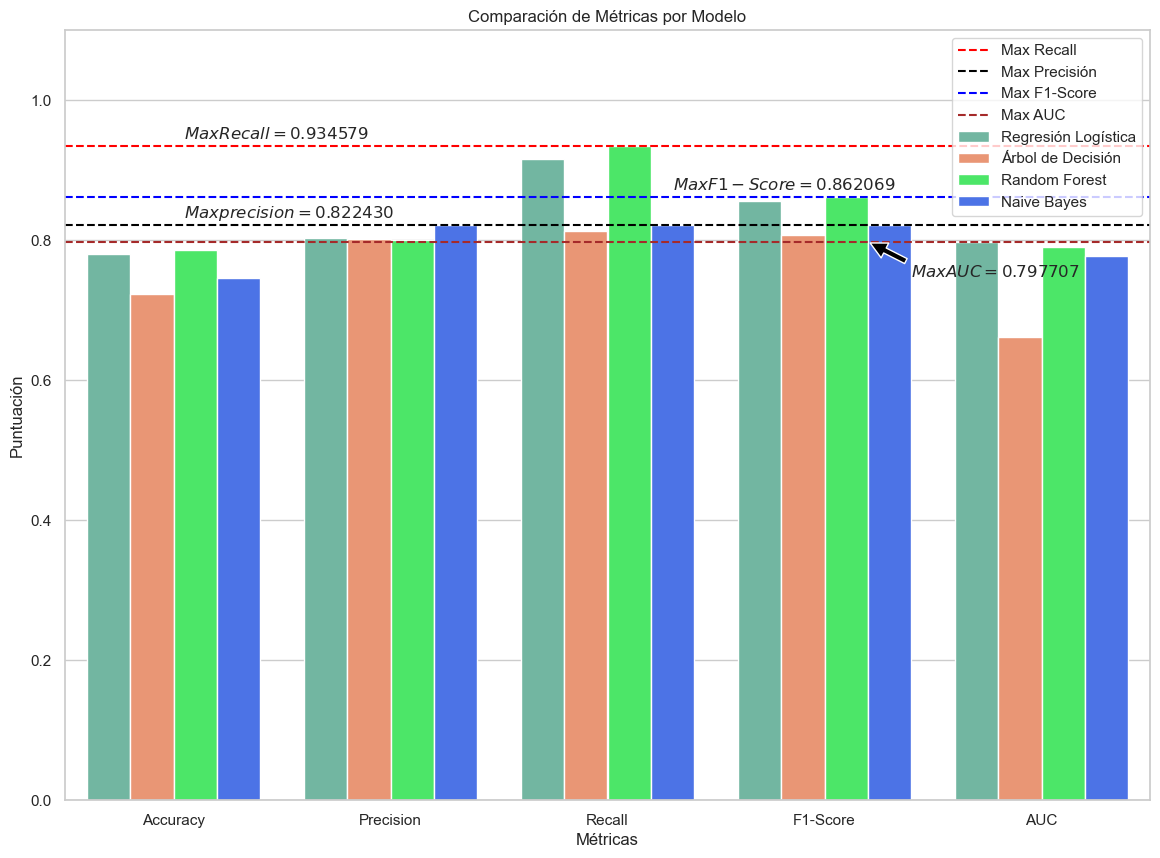

In [116]:
## Graficando la comparación de métricas entre nuestros modelos evaluados
plt.figure(figsize=(14, 10))
colors = ['#66c2a5', '#fc8d62',"#33FF57", "#3366FF"]
sns.barplot(data=comparativo_metricas.melt(id_vars='Métricas'), x='Métricas', y='value', hue='variable', palette=colors)
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
ax = plt.gca()  # Obtiene el objeto de los ejes
ax.set_ylim(bottom=0, top=1.1)
plt.axhline(y=0.934579, color='red', linestyle='--', label='Max Recall')
plt.axhline(y=0.822430, color='black', linestyle='--', label='Max Precisión')
plt.axhline(y=0.862069, color='blue', linestyle='--', label='Max F1-Score')
plt.axhline(y=0.797707, color='brown', linestyle='--', label='Max AUC')
plt.annotate('$Max Recall = 0.934579$', xy=(0.5, 0.934579), xytext=(0.05, 0.934579+0.01),fontsize=12)
plt.annotate('$Max precision = 0.822430$', xy=(0.5, 0.822430), xytext=(0.05, 0.822430+0.01),fontsize=12)
plt.annotate('$Max F1-Score = 0.862069$', xy=(0.5, 0.862069), xytext=(2.3, 0.862069+0.01),fontsize=12)
plt.annotate('$Max AUC = 0.797707$', xy=(3.2, 0.797707), xytext=(3.4, 0.797707-0.05),fontsize=12, 
                                        arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.title('Comparación de Métricas por Modelo')
plt.legend();

## 3.6 Conclusiones de la Comparación 

* Realizamos la comparación de nuestros 4 modelos, **La regresión Logistica, El árbol de Decisión, Random Forest y Naive Bayes**. Aplicamos varias métricas para cada uno de nuestros modelos, entre las cuales tenemos: **Accuracy, Precision, Recall, F1Score y AUC**.


* Es importante tener en cuenta que estamos trabajando con **2 clases: 0-Good Customer y 1-Bad Customer**. Debido a esto separamos nuestro cuadro de clasificación de métricas para estas dos clases, a fin de visualizar de mejor manera los valores para las clases.


* Todas nuestras métricas mostradas en la gráfica son evaluadas para nuestra **clase 0-Good customer**, ya que deseamos saber que cliente es el adecuado para poder brindarle el crédito y saber que pueda cumplir con los pagos del crédito. Para nosotros esto es de suma importancia, solo queremos saber que cliente es Buen cliente y buen pagador.


* Al evaluar las métricas, observamos que **dos modelos resaltan por encima de los demás**, estos son la **Regresión Logística y Random Forest**. Los valores de las métricas para estos dos modelos, en su mayoría son los más altos.


* Analizando individualmente las métricas, consideramos que las más importantes a considerar para **nuestro modelo**, debido a que **se encuentra desbalanceado**, son las métricas **Precisión, Recall, F1-Score y AUC**.

$$\text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}$$

> * La **Precisión**, nos evalúa sobre nuestra predicción, esto nos dice que de todos los Verdaderos Positivos predichos que tantos son Verdaderos Positivos y que tantos nos salieron como Falsos positivos. Esto quiere decir que mientras más se acerque al valor de 1 nuestra métrica, nuestra predicción será más buena. Pero esto no exime de que algunos Positivos se vayan a nuestros Falsos negativos. Debido a esto no podemos quedarnos solo con esta métrica, si es importante a tener en cuenta pero no tiene que ser la única.


> * Debido a todo esto, siempre es importante tener esta métrica en un valor elevado, para nuestro análisis si bien Naive Bayes tiene la mayor Precisión, el resto de modelos estan cerca de este valor, por eso que por el momendo no descartamos ningun modelo.

$$\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}$$

> * El **Recall**, nos evalúa sobre nuestras muestras reales, esto nos dice que de todos nuestros datos reales Positivos que tantos son realmente Positivos y que tantos son Falsos Negativos. Esto quiere decir que mientras más se acerque el valor a 1, tendremos menos Falsos negativos y mejor predicción de los Reales Positivos, esto es benficioso porque si tenemos menos falsos Negativos, esto quiere decir que pocos verdaderos positivos se escapan de ser predichos como Positivos. Esta métrica nos ayuda mucho a saber que realmente nuestros datos positivos tengan prediccion positiva.


> * Para nuestro caso, el que tiene mayor Recall es el Random Forest, seguido de la Regresión Logística. Mientras tanto el modelo Naive Bayes que tenia la mejor precisión, queda relegado. Si bien es cierto con el Recall ya podriamos ir dandonos cuenta de que modelo podria ser mejor, lo mejor es evaluar otra métrica, la cual viene a continuación, la cual nos evalúa un promedio ponderado de las métricas analizadas hasta el momento.

$$\text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}$$

> * El **F1-Score**, esta métrica nos evalúa el promedio ponderado de la Precisión y del Recall. Esto es importante debido a que como observamos muchas veces ciertos modelos tienen más alta precisión que otros, pero en el Recall quedan relegados. Con esta métrica nos apoyamos de un aspecto estadístico para poder ponderar estos valores y deducir que modelo podría comportarse de mejor manera. Normalmente se considera mucho este valor en data desbalanceada como en nuestro caso.


> * Para nuestro análisis, conseguimos que el mayor F1-Score lo logra el Random Forest, seguido de la Regresión Logística. El Naive bayes y El Árbol de Decisión quedan muy atrás. Por el momento nos quedamos con los dos modelos indicados - Random Forest y Regresión Logística.

$$\text{Especificidad} = \frac{\text{Verdaderos Negativos}}{\text{Verdaderos Negativos} + \text{Falsos Positivos}}$$

> * La **Especificidad**, esta métrica muchas veces no es muy considerada, pero es de suma importancia cuando se analiza dos clases, ya que una clase esta intimamente relacionada con la otra clase. Recordemos que la especificidad es de todos nuestros datos reales Negativos, que tantos son verdaderamente Negativos y cuantos son Falsos positivos. Si nuestro valor se acerca a 1, esto nos indica que tenemos pocos falsos positivos, lo cual es importante para nuestro análisis ya que siempre queremos tener pocos datos predichos como positivos que no lo sean. 


> * En nuestro análisis, Si observamos bien como se distribuye la Matriz de confusión, y los cálculos de Especifidad para nuestra clase 0, serían los mismos de calcular el Recall para nuestra clase 1. Debido a esto solo analizaremos todos los Recall de nuestras clases 1.


> * Según nuestros datos, los Recalls para la clase 1, en todos los modelos, los que tienen mayor valor son el Modelo de Naive Bayes y Árbol de Decisión, mientras que el Random Forest y Regresión Logística, quedan un poco atrás. Pero considerando en general, si bien esta métrica influye en nuestra decisión, validamos que por más que Random Forest y Regresión Logística tenga valores menores que los otros modelos, seguiremos manteniendo nuestra postura de elegir estos dos modelos.

$$\text{La fórmula del Área bajo la Curva ROC (AUC) es:}$$

$$AUC = \int_{0}^{1} \text{TPR} \, d\text{FPR}$$

\begin{align*}
\text{TPR} & : \text{Tasa de Verdaderos Positivos (Sensibilidad o Recall)}, \\
\text{FPR} & : \text{Tasa de Falsos Positivos}.
\end{align*}


> * Como última Métrica a Analizar, y también una de las más importantes es el **AUC**, el cual nos mide la **comparación** entre la **Tasa de Verdaderos Positivos y los Falsos Positivos**. Es importante tener en cuenta que lo que queremos es conseguir mayor número de verdaderos Positivos ya que queremos conseguir predecir a nuestra clase 0-Good customer. Por esta razón, mientras más alto sea el valor de AUC, esto nos indica que tendremos mayor cantidad de verdaderos Positivos con menos cantidad de Falsos Positivos.


> * Para nuestro análisis, Los que tienen mayor AUC, son Regresión Logística y Random Forest. Si bien el primero es mayor que el segundo, es por muy mínima diferencia, con lo cual consideramos que su valor practicamente es el mismo para ambos.

Finalmente, luego de analizar todas nuestras métricas que consideramos importantes para nuestra predicción, y sabiendo que lo que queremos conseguir es predecir de mejor manera nuestra clase 0, teniendo la menor cantidad de Falsos positivos y Falsos Negativos, concluimos que: El modelo a elegir es el **RANDOM FOREST**.

# 4. Optimizando nuestro modelo con Hiperparámetros (Random Forest)

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

In [140]:
## Entrenando el modelo
model = RandomForestClassifier()
# model.fit(x_train_scaled, y_train)

In [141]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Especificar el AUC-ROC como métrica de evaluación
# scoring = make_scorer(roc_auc_score)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(x_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [142]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test_scaled)

In [143]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.796078,0.755556,0.790000,0.775817,0.784462
recall,0.948598,0.395349,0.790000,0.671973,0.790000
f1-score,0.865672,0.519084,0.790000,0.692378,0.766317
support,214.000000,86.000000,0.790000,300.000000,300.000000


In [144]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = best_model.predict_proba(x_test_scaled)[:,1]

In [145]:
## En este caso, sabemos que la clase 0 - Good costumer
## Por ende procedemos a calcular las métricas para esta clase
accuracy = accuracy_score(y_test, y_pred)
precision = report['Class 0']['precision']
recall = report['Class 0']['recall']
f1 = report['Class 0']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_random_forest_hiper = []
metricas_random_forest_hiper.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.79
Precision: 0.796078431372549
Recall: 0.9485981308411215
F1-score: 0.8656716417910448
AUC-ROC: 0.8017278852423386


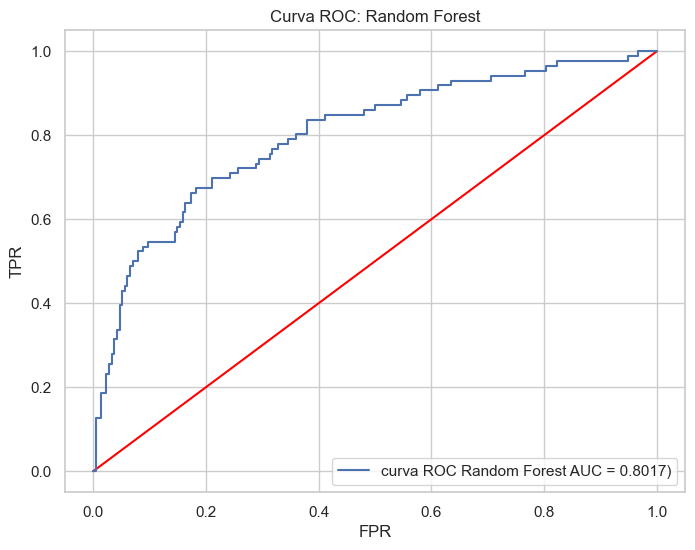

In [146]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Random Forest AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Random Forest')
plt.legend(loc = 'lower right')

## 5. Conclusión Final

* El **Modelo Random Forest**, es el que nos resulta mejor para nuestro conjunto de datos y para lo que queremos obtener, la Predicción de la clase 0 - Good Customer.


* Al hacer uso de **Hiperparámetros para nuestro modelo de Random Forest**, lo evaluamos para diferentes Scoring, consiguiendo mejores resultados evaluando en el **Scoring F1**, con lo cual obtuvimos ligeramente valores mayores de nuestras métricas. Consideramos que el análisis con los Hiperparámetros nos ayudo a mejorar nuestros valores de métricas haciendo que consigamos un mejor modelo.


* Es importante analizar todas las métricas para tomar nuestra decisión final, es por eso que consideramos como métricas más importantes el **Recall, Precisión, F1-Score y el AUC**.


* Con este modelo elegido **Random Forest**, podemos concluir que nuestras predicciones serán optimas, y que cumplen con las condiciones que deseamos conseguir, lo cual es evaluar potenciales clientes que puedan cumplir con los créditos.

In [175]:
## Colocando en una tabla comparativa nuestro modelo con y sin Hiperparámetros
metricas_random_forest_sinhiper = comparativo_metricas[['Métricas', 'Random Forest']]
metricas_random_forest_hiperparame = pd.DataFrame(metricas_random_forest_hiper)
resultado_final = pd.concat([metricas_random_forest_sinhiper, metricas_random_forest_hiperparame], axis=1)
resultado_final.rename(columns={0: 'Random Forest con Hiper'}).style.background_gradient()

,Métricas,Random Forest,Random Forest con Hiper
0,Accuracy,0.786667,0.790000
1,Precision,0.800000,0.796078
2,Recall,0.934579,0.948598
3,F1-Score,0.862069,0.865672
4,AUC,0.790018,0.801728
